<h1 style="text-align: center;">Predict used cars price in Saudi Arabia's</h1>
<h3 style="text-align: center;">Ghaisan Rabbani</h3>

---

## **Section 1. Business Understanding**

### **1.1 Context**

The used car market is a vital segment of the automotive industry, offering affordable options for buyers and opportunities for sellers to maximize the value of their pre-owned vehicles. syarah.com is an online platform that facilitates the buying and selling of new and certified pre-owned cars, serving customers across Saudi Arabia.

The application targets two main customer segments:
- Customers who want to sell their used cars.
- Customers who are looking to buy new or used cars.

syarah.com provides a wide range of car options tailored to customers' needs. Customers can select cars based on specifications such as brand, model, year of manufacture, vehicle origin, additional features, engine capacity, fuel type, transmission type, mileage, location, and negotiable pricing. Car prices are heavily influenced by these factors, making accurate pricing essential to attract buyers and support revenue.

Price depreciation is a significant factor, as car values naturally decrease over time. For example, a new car typically loses a considerable portion of its value within the first year and continues to decline substantially within the next few years. The rate of depreciation is influenced by factors such as mileage, physical condition, and changing market preferences. Setting prices too high can lead to slower sales, increased storage costs, and further value loss, while setting prices too low may result in missed revenue opportunities. Therefore, understanding depreciation patterns is essential for determining competitive prices that appeal to buyers while ensuring profitability.

With the growing availability of data, syarah.com can leverage analytics and predictive modeling to optimize pricing and manage inventory. Insights into market trends, value determinants, and depreciation patterns can help the platform attract more buyers, boost revenue, and enhance customer satisfaction.












### **1.2 Problem Statements**

In the online car marketplace, both sellers and buyers face challenges in determining accurate and competitive prices for used cars due to the wide variety of models and specifications. With the available data on vehicle conditions, either for cars being sold or those being sought, it becomes crucial to predict used car prices accurately to avoid underpricing or overpricing. Additionally, identifying the key factors that influence marketability is essential for developing effective pricing strategies that attract more buyers and optimize sales performance.

### **1.3 Goals**

1. **Developing an Accurate and Competitive Pricing Prediction System** : 
Utilizing data-driven algorithms to minimize the risk of underpricing or overpricing, helping sellers and buyers achieve optimal value.

1. **Enhancing Market Transparency and Trust** : 
Providing clear information on factors influencing car prices, such as vehicle condition, mileage, production year, and market trends, to build trust between sellers and buyers.

1. **Driving Transaction Growth and Marketplace Business Expansion** :
Offering fair and transparent price predictions to support easier and more profitable decision-making, accelerating transactions, and driving business growth.

1. **Introducing Paid Recommendation Features for Strategy Optimization** : 
Offering premium features to assist sellers in optimizing inventory and marketing strategies, preventing pricing mismatches, and increasing user profitability as well as Syarah.com’s revenue.


### **1.4 Analytical Approach**

To address these challenges, the necessary steps involve analyzing data to identify patterns in the features that differentiate the prices of one car from another. Subsequently, a regression model will be developed as a tool to support the marketplace in making more accurate decisions when predicting used car prices. The primary goal is to create an effective model that assists the marketplace, enhances customer satisfaction during transactions on the platform, and ensures the company achieves optimal profitability.

### **1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- **Business Metrics**
    - **Revenue Growth** : Measures the increase in revenue from paid features and transactions on the platform.
    - **Conversion Rate** : The percentage of users who successfully complete a transaction (buy or sell) compared to the total number of users visiting the platform.
    - **Customer Satisfaction** : Measures the level of user satisfaction with the accuracy of price predictions and the platform's services.
    - **Adoption Rate for Paid Features** : The percentage of users who utilize paid recommendation features from the total active users.

- **Machine Learning Evaluation Metrics** : Some evaluation metrics used to assess the model’s performance are as follows:
    - R-Squared (R²): Indicates how well the model can explain the variation in the data. A higher R² value suggests a better model in explaining the relationship between features and the target.
    - MAE (Mean Absolute Error): Measures the average absolute difference between predicted values and actual values. MAE gives an idea of how large the prediction errors are in the same unit as the target (used car price).
    - RMSE (Root Mean Squared Error): RMSE provides a clearer picture of the impact of larger prediction errors. This metric is sensitive to outliers, making it useful for evaluating models that might generate extreme predictions.
    - MAPE (Mean Absolute Percentage Error): Measures the percentage error in the model’s predictions, providing a more understandable perspective in terms of relative values.

- **Overview of Machine Learning Evaluation Metrics**
    - MAE and RMSE help ensure that the predicted prices are more accurate, enhancing customer satisfaction and reducing losses due to pricing errors.
    - MAPE provides a clear percentage view of how well the price predictions are made, helping in optimizing marketing strategies and more accurate pricing decisions.
    - R² indicates how effectively the model explains price variations, supporting more informed and strategic decision-making for the company.


### **1.6 Success Criteria**
**Price Prediction Accuracy**
- MAE (Mean Absolute Error): Target ≤ 5% difference between predicted price and actual price.
- RMSE (Root Mean Squared Error): Target ≤ 10% for larger prediction errors.
- R² (R-squared): Target ≥ 0.80, indicating that the model can explain more than 80% of the price variation.

## **Section 2. Data Understanding**

In [370]:
#manipulation data
import pandas as pd
import numpy as np

#visualisasi data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


#statistic
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#missing values
import missingno as msno

#machine learning (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV,KFold,cross_val_score,RandomizedSearchCV,LearningCurveDisplay
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from category_encoders import BinaryEncoder
from feature_engine.encoding import RareLabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


#model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin

import pickle
import shap

from feature_engine.outliers import ArbitraryOutlierCapper



In [371]:
df = pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 3. machine learning\Capstone\Predict-used-cars-price-in-Saudi-Arabia-s\data\raw\data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


### **2.1 General Information**

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Based on the information above, it is known that in the dataset there are 11 columns with 5624 rows. The column types are as follows:
- 6 Object data types ( Type, Region, Make, Gear_Type, Origin, Options )
- 4 Numeric data types ( Year, Engine_Size, Mileage, Price )
- 1 Boolean data types ( Negotiable )

### **2.2 Feature Information**

| Feature         | Description                                            | Impact to business                                 |
|-----------------|--------------------------------------------------------|----------------------------------------------------|
| **Type**        | Type of used car                                       | Determining the types that are popular in market   |
| **Region**      | The region in which the used car was offered for sale  | Understanding sales trends by location             |
| **Make**        | The company name                                       | Find out the most popular car brands               |
| **Gear_Type**   | Gear type size of used car                             | Determining customer preference (auto or manual)   |
| **Origin**      | Origin of used car                                     | Helps determine customers are interested in (local)|
| **Options**     | Options of used car                                    | Determining car values that can increase the price |
| **Year**        | Manufacturing years                                    | year of production affects for price and demand    |
| **Engine_Size** | The engine size of used car                            | Determine buyer interest based on vehicle needs    |
| **Mileage**     | Mileage of used car                                    | The kilometers traveled affect the selling price   |
| **Negotiable**  | True if the price is 0, that means it is negotiable    | Demonstrate pricing flexibility                    |
| **Price**       | Price used cars                                        | important factors for buyers                       |

### **2.3 Statistics Summary**

In [373]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


- If it is seen that there is 25% of used car data with a price of 0, it will be followed up.
- The Mileage column has a maximum value of 20 million miles (32.2 million kilometers), which is highly unrealistic for most private vehicles.

In [374]:
df.describe(include=object)

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


## **Section 3. Data Cleaning**

The data cleaning process is carried out to prepare the data to be analyzed. There are five stages that will be carried out in the data cleaning process:

- **Feature selection**: Eliminate irrelevant features and anomalous values.
- **Missing values**: Address missing values by deletion.
- **Duplicate values**: Remove duplicate entries.
- **Spelling Error**: Standardize spellings and correct errors.
- **Handling Outlier**: Detect and resolve the outlier.


### **3.1 Feature selection**

The **"Negotiable"** column and data with **"Price=0"** were removed because they are not helpful in predicting prices. A price of 0 usually means negotiations are ongoing.

In [375]:
print("total data Negotiable: ",(df['Negotiable']==True).sum())

total data Negotiable:  1796


In [376]:
df= df.drop(df[df['Price'] == 0].index)
df= df.drop('Negotiable', axis = 1)

### **3.2 Missing Values**

total missing values in dataframe:  0


Type           0 - (0.00%)
Region         0 - (0.00%)
Make           0 - (0.00%)
Gear_Type      0 - (0.00%)
Origin         0 - (0.00%)
Options        0 - (0.00%)
Year           0 - (0.00%)
Engine_Size    0 - (0.00%)
Mileage        0 - (0.00%)
Price          0 - (0.00%)
dtype: object

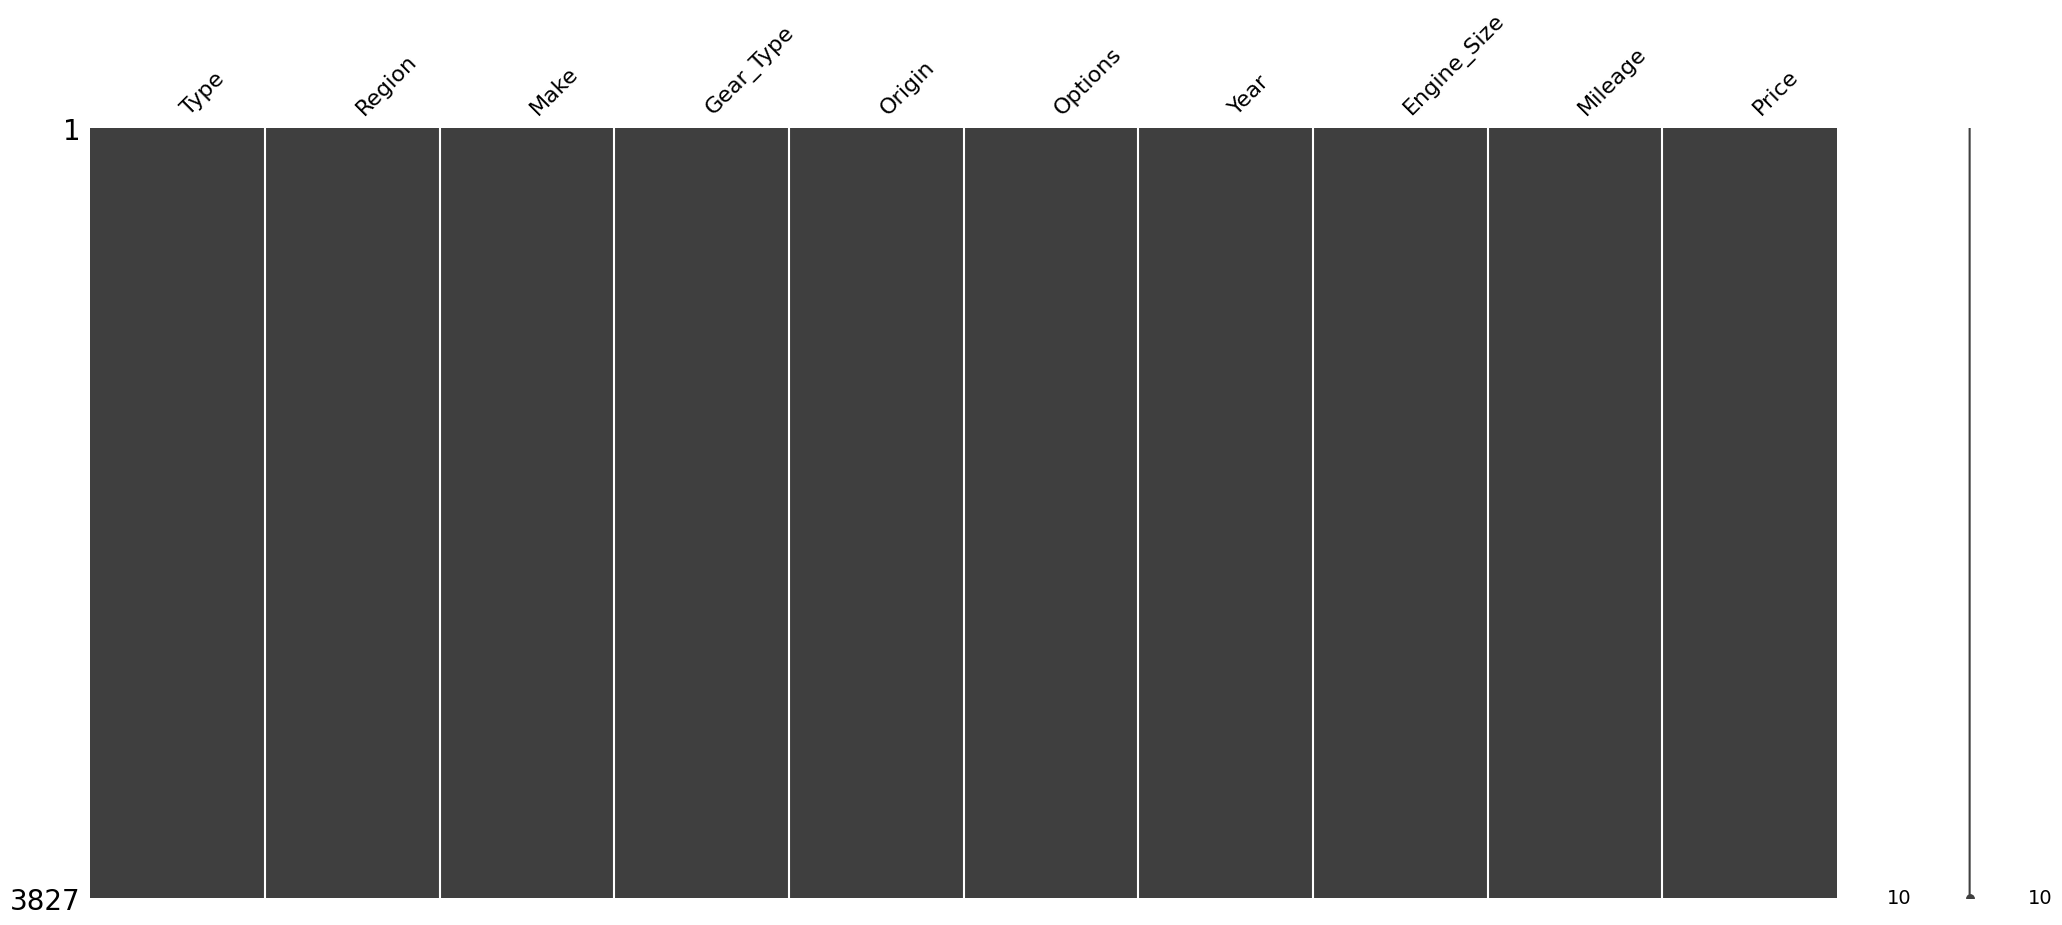

In [377]:
msno.matrix(df)
print("total missing values in dataframe: ",df.isna().sum().sum())
df.isnull().sum().apply(lambda x: f'{x} - ({x/len(df):.2%})')

This dataset does **not have any missing values**

### **3.3 Duplicated Values**

In [378]:
print("total duplicated data in dataframe:",df.duplicated().sum())

total duplicated data in dataframe: 3


**Duplicate data will be removed** from its value because it has the same information to be learned in machine learning, so it can increase the efficiency and performance of machine learning.

In [379]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

# Cek duplicate data
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


### **3.4 Spelling Error**

In [380]:
listItem = []
for i, col in enumerate(df.columns):
    listItem.append([col, df[col].nunique(), list(df[col].drop_duplicates().values)])

df_desc = pd.DataFrame(data=listItem, columns=['Features', 'Nunique', 'Unique Name'])
df_desc

,Features,Nunique,Unique Name
0,Type,320,"[Yukon, Range Rover, Optima, CX3, Cayenne S, S..."
1,Region,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam,..."
2,Make,56,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai..."
3,Gear_Type,2,"[Automatic, Manual]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Full, Semi Full, Standard]"
6,Year,41,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 200..."
7,Engine_Size,65,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, ..."
8,Mileage,1346,"[80000, 140000, 220000, 25000, 189000, 155, 11..."
9,Price,466,"[120000, 260000, 42000, 58000, 85000, 48000, 8..."


**"Origin"** column needs to be improved. The **"Unknown"** value can be replaced with **"Other"** to improve data consistency.

In [381]:
df.groupby('Origin').count()

,Type,Region,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
Origin,,,,,,,,,
Gulf Arabic,495,495,495,495,495,495,495,495,495
Other,420,420,420,420,420,420,420,420,420
Saudi,2893,2893,2893,2893,2893,2893,2893,2893,2893
Unknown,16,16,16,16,16,16,16,16,16


Because Rows **"Other" > "Unknown"**, then the **"Unknown"** value will be changed to **"Other"**

In [382]:
df['Origin'] = df['Origin'].replace('Unknown', 'Other')
print("Origin Values : ",df['Origin'].unique())

Origin Values :  ['Saudi' 'Gulf Arabic' 'Other']


### **3.5 Handling Outlier**

**Numerical Values**
- Year
- Engine_Size
- Mileage
- Price

In [383]:
num_features= df.select_dtypes('number').columns

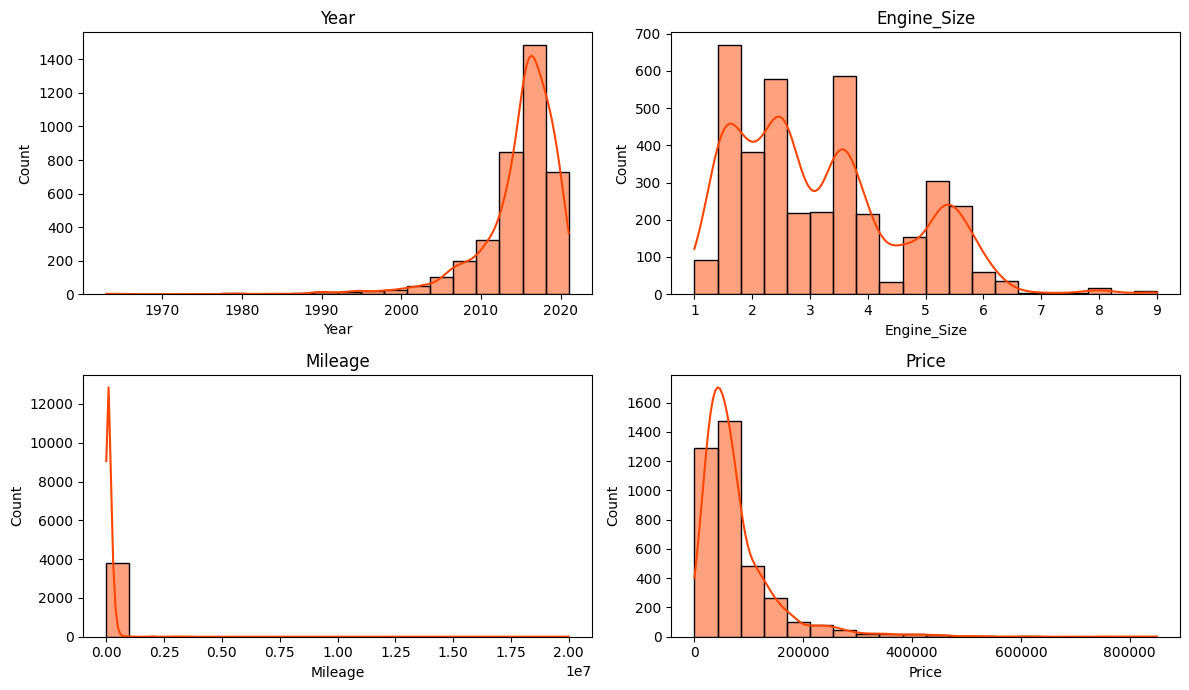

In [384]:
#Distribution for Numerical Features
plt.figure(figsize=(12,7))
for idx,feature in enumerate(df[num_features].columns, start=1):
    sns.histplot(df[feature], bins=20, kde=True, ax=plt.subplot(2,2,idx), color='orangered')
    plt.subplot(2,2,idx).set_title(feature)
plt.tight_layout()
plt.show()

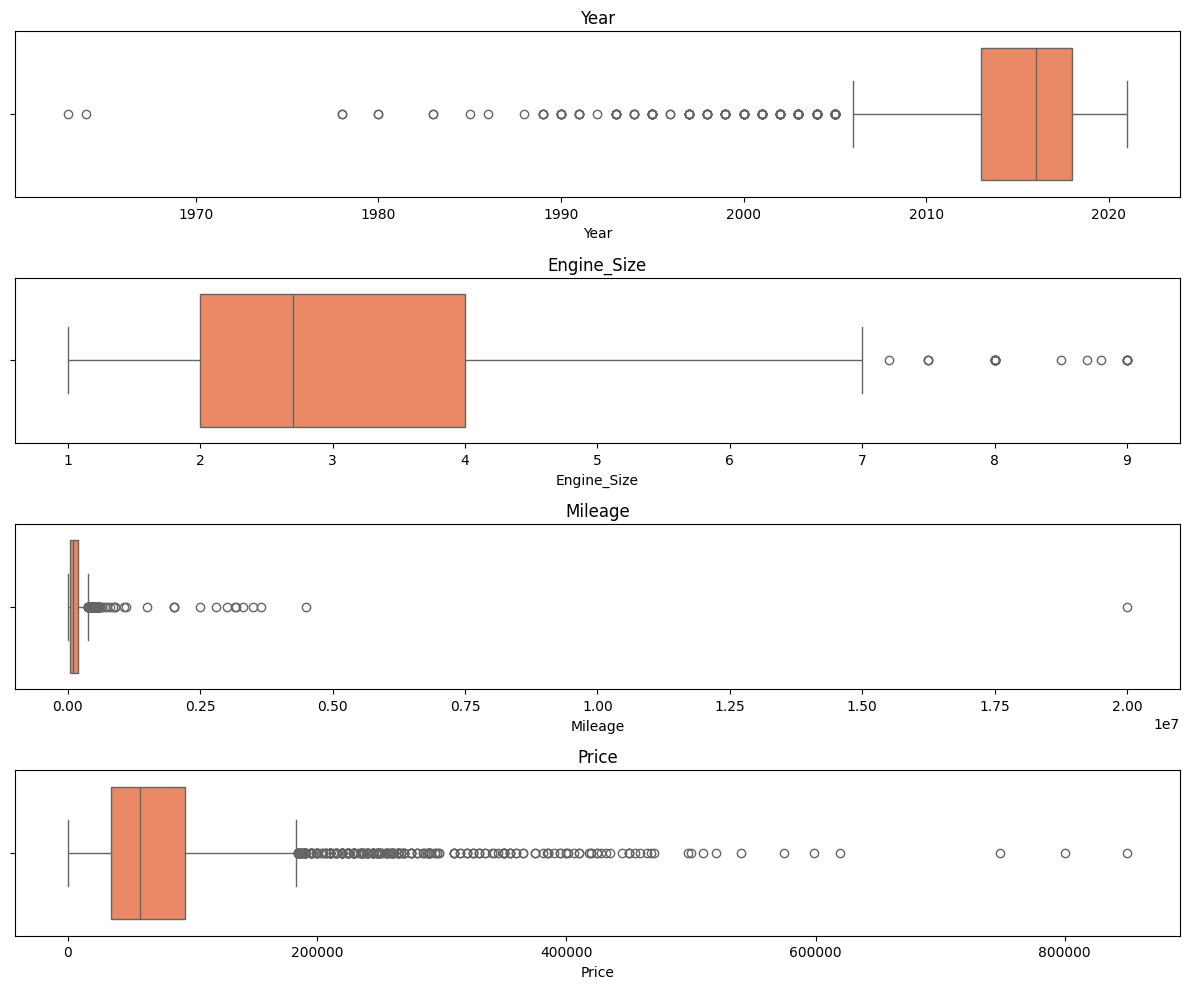

In [385]:
#Box Plot for Numerical Features

plt.figure(figsize=(12,10))
for idx,feature in enumerate(df[num_features].columns, start=1):
    sns.boxplot(x=df[feature], ax=plt.subplot(4,1,idx), color='coral')
    plt.subplot(4,1,idx).set_title(feature)
plt.tight_layout()
plt.show()

There are some outliers in each feature, so to handle this, data processing is carried out using the IQR method and understanding of the domain context.

- **Year**

In [386]:
pd.DataFrame(df['Year'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Year,3824.0,2014.851203,5.110916,1963.0,2013.0,2016.0,2018.0,2021.0


**Year=1963** for used cars is too long, so it needs to be investigated.

In [387]:
# Sort by ascending year
df.sort_values(by='Year', ascending=True).head(5).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,22000
1,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,75000
2,Patrol,Abha,Nissan,Manual,Saudi,Standard,1978,4.0,30000,28000
3,Land Cruiser 70,Riyadh,Toyota,Manual,Saudi,Standard,1978,4.0,400000,18000
4,S,Riyadh,Mercedes,Automatic,Other,Standard,1980,3.0,160000,40000


if it is seen in the table that a used car in **1963 cannot have a Mileage value of 300**, then it is an outlier. so it will be **drop year<2000**

**Drop Year<2000, Reason :**
- if it is seen on the histogram that the graph shows **negative skewness**, this indicates that used cars under 2000 are rarely sold. then limitation will be done by **deleting data that has a year under 2000** because the information of the discarded data is not too much.
- By domain knowledge In Saudi Arabia, people often prefer to buy a new car or the latest model. This preference is influenced by factors such as the climate, the need for fuel efficiency, frequent daily driving and the country's strict emission regulations.

In [388]:
print("Total data with (Year<2000): ",df[df['Year'] < 2000].shape[0])

Total data with (Year<2000):  74


In [389]:
#Drop data with (Year<2000)
df=df[df['Year']>=2000]
df.sort_values(by='Year', ascending=True).head(5).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Maxima,Jeddah,Nissan,Manual,Saudi,Standard,2000,3.5,400000,12500
1,S,Dammam,Mercedes,Automatic,Saudi,Semi Full,2000,3.0,100,15000
2,ML,Jeddah,Mercedes,Automatic,Saudi,Full,2000,3.3,111744,18000
3,Suburban,Aseer,GMC,Automatic,Saudi,Semi Full,2000,6.0,128000,80000
4,Grand Marquis,Dammam,Mercury,Automatic,Saudi,Semi Full,2000,3.8,179000,14000


- **Engine_Size**

In [390]:
pd.DataFrame(df['Engine_Size'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,3750.0,3.170747,1.456528,1.0,2.0,2.7,4.0,9.0


**Engine_Size=9** is a value that is rarely found, so it needs to be investigated.

In [391]:
df.sort_values(by='Engine_Size', ascending=False).head(10).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,15000
1,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,36000
2,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,178000
3,FJ,Hail,Toyota,Automatic,Saudi,Full,2014,9.0,308000,75000
4,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,155000
5,Marquis,Riyadh,Ford,Automatic,Other,Full,2008,9.0,115,17000
6,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,240000
7,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Semi Full,2013,8.7,177,88000
8,Dyna,Riyadh,Isuzu,Manual,Saudi,Standard,2003,8.5,330,40000
9,Other,Qassim,Other,Manual,Other,Full,2019,8.0,24643,330000


**Drop Engine_Size>=8, Reason :**
- unpredictable price due to engine_size so that it will produce bias in machine learning.
- based on domain knowledge that it is rare and almost never for engine_size with a size greater than 8.
    - City Cars: Small engines (1000-1500 cc) for fuel efficiency.
    - Family Cars: Medium engines (1500-2500 cc), balanced power and efficiency.
    - Sports Cars: Large engines (3000+ cc), high power and torque.
    - Trucks & SUVs: Very large engines (4000+ cc), high towing capacity.

In [392]:
print("Total data with (Engine_Size>=8): ",df[df['Engine_Size']>=8].shape[0])

Total data with (Engine_Size>=8):  25


In [393]:
#Drop data with (Engine_Size>=8)
df=df[df['Engine_Size']<8]
df.sort_values(by='Engine_Size', ascending=False).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
963,D-MAX,Abha,Isuzu,Manual,Saudi,Full,2019,7.5,40000,125000
750,LX,Taef,Lexus,Automatic,Gulf Arabic,Full,2018,7.5,122000,340000
3010,FJ,Aseer,Toyota,Automatic,Saudi,Full,2017,7.5,138000,118000
1400,Yukon,Makkah,GMC,Automatic,Saudi,Full,2008,7.2,299000,30000
1429,Dyna,Dammam,Isuzu,Manual,Saudi,Standard,2013,7.0,300,82000


- **Mileage**

In [394]:
pd.DataFrame(df['Mileage'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Mileage,3725.0,139932.471678,371984.804364,100.0,49000.0,103000.0,181000.0,20000000.0


**mileage value of 2000000 is very unreasonable**, so it needs to be investigated.

In [395]:
df.sort_values(by='Mileage', ascending=False).head(20).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,9000
1,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,30000
2,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,10000
3,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,27000
4,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,20000
5,Fusion,Hail,Ford,Automatic,Saudi,Full,2010,2.5,3000000,17000
6,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,35000
7,Marquis,Riyadh,Ford,Automatic,Saudi,Semi Full,2005,4.6,2500000,9000
8,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Full,2009,2.4,2013000,35000
9,Optima,Riyadh,Kia,Automatic,Saudi,Full,2014,2.5,2002500,42000


Used cars with **mileage worth 2000000 have a year 2009 which does not make sense**. Mileage calculations will be made based on the smallest year of data.

In [396]:
print("Min Year used cars in dataset: ",df['Year'].min(), ", So this dataset is based on the years 2000 until now")

Min Year used cars in dataset:  2000 , So this dataset is based on the years 2000 until now


$$
2024  - 2000 = 24\text{ year}
$$

**Drop Mileage>=600.000, Reason :**

Based on the latest research data, cars in Saudi Arabia only travel about 16,000 miles or 25,000 kilometers per year. Therefore, the figure of 2,000,000 miles for a 2009 car is very unreasonable. So, it needs to be handled by dropping the data, with the following calculation:

$$
25.000 \text{ km/year} \times 24 \text{ year} = 600.000 \text{ km}
$$

References: **https://www.sciencedirect.com/science/article/pii/S0140988320303662**



In [397]:
print("Total data with (Mileage>=600000): ",df[df['Mileage']>=600000].shape[0])

Total data with (Mileage>=600000):  21


In [398]:
#Drop data with (Mileage>=600000)
df=df[df['Mileage']<600000]
df.sort_values(by='Mileage', ascending=False).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2663,Hiace,Riyadh,Toyota,Manual,Saudi,Standard,2010,2.7,573000,37000
5140,D-MAX,Dammam,Isuzu,Manual,Saudi,Standard,2007,2.5,570000,27000
1640,Grand Marquis,Riyadh,Mercury,Automatic,Other,Full,2007,4.6,570000,24000
772,Hiace,Riyadh,Toyota,Manual,Saudi,Standard,2017,2.7,555555,73000
2614,Camry,Jeddah,Toyota,Manual,Saudi,Standard,2010,2.0,550000,20000


- **Price**

In [399]:
pd.DataFrame(df['Price'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Price,3704.0,78991.034827,72707.609363,1.0,36000.0,58500.0,95000.0,850000.0


- Price that has a value of 1 makes no sense, this is the same as giving the car to the seller. 
- is the used car price 850000.0 reasonable.

of the above problems,then it needs to be investigated

In [400]:
desc_price=df.sort_values(by='Price', ascending=False).head(5).reset_index(drop=True)
asc_price=df.sort_values(by='Price', ascending=True).head(5).reset_index(drop=True)

display(asc_price,desc_price)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
1,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
2,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
3,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
4,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
1,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
2,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
3,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000


the price of 1, 500, ... does not make sense when viewed from the bottom but when viewed from the top the value of 850000 makes sense because it is seen from all the colums, then a limitation will be made for the price.

**Drop Price<5000, Reason :**
- if maintained, the machine learning results for prediction will result in a decrease in accuracy.
- If you look at used car sales websites, **the lowest average price is 5,000**.

references : [Syarah.com](https://syarah.com/), [YallaMotor.com](https://ksa.yallamotor.com/)



In [401]:
print("Total data with (Price<5000): ",df[df['Price']<5000].shape[0])

Total data with (Price<5000):  66


In [402]:
#Drop data with (Price>=5000)
df=df[df['Price']>=5000]
df.sort_values(by='Price', ascending=True).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
693,Accent,Dammam,Hyundai,Manual,Saudi,Standard,2005,1.5,294602,5000
3482,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2006,3.6,380000,5000
3052,Expedition,Al-Medina,Ford,Automatic,Saudi,Semi Full,2003,5.4,400000,5000
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,5500
5432,Optima,Taef,Kia,Manual,Other,Standard,2006,1.3,290000,6000


### 3.6 Summary


**Total dataset before drop : 5624**

**Total dataset after drop : 3638**



In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3638 entries, 2 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3638 non-null   object 
 1   Region       3638 non-null   object 
 2   Make         3638 non-null   object 
 3   Gear_Type    3638 non-null   object 
 4   Origin       3638 non-null   object 
 5   Options      3638 non-null   object 
 6   Year         3638 non-null   int64  
 7   Engine_Size  3638 non-null   float64
 8   Mileage      3638 non-null   int64  
 9   Price        3638 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 312.6+ KB



- **Feature selection:**
The **"Negotiable"** column and data with **"Price=0"** were removed because they are not helpful in predicting prices. and total drop is **1796 data**

- **Missing values:** data with missing values cannot be used in machine learning but there are no missing values in this dataset.

- **Duplicated Values:** Dupicated data can have an effect performance and eficiency in machine learning. Total duplicated data is **3 data** will be removed.

- **Spelling error:** In Origin colums have a value Unknown and other, so I will change Unknown to Other. 

- **Handling Outlier:** Handing outliers is done to improve the accuracy of prediction. there are several steps taken
    - Total drop data with (Year<2000):  74
    - Total drop data with (Engine_Size>=8):  25
    - Total drop data with (Mileage>=600000):  21
    - Total drop data with (Price<5000):  66

## **Section 4. Data Generation**

1. **Seen Data**<br>
Seen data refers to data that has been observed and used in the development process of a machine learning model. This includes data used for training and testing the model. The data will be divided into 80% training data and 20% test data.
    - Training data: Training data is a subset of the seen data used to train the machine learning model. The training process involves an algorithm that tries to minimize the error or discrepancy between the predictions and the actual values. The training data helps the model understand the trends and patterns in used car prices based on relevant variables.
    - Test data: Test data is another subset of the seen data used to test how well the model, which has been trained with the training data, performs. The goal is to evaluate the model's ability to predict used car prices on data it has never seen before (to avoid overfitting).
2. **Unseen Data**<br>
Unseen data refers to data that the model has never encountered before. This data is used in the context of business calculations and decision-making at Syarah.com. Unseen data is not involved in training or testing the model, but it will be used to test the model's capability in real-world situations and to make better business decisions.

### **4.1 Constructing Seen and Unseen Data**

In [404]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

# Check the shape of the df_seen
df_seen.reset_index(drop=True, inplace=True)
print("total data seen", df_seen.shape)
display(df_seen.head(5))

# Check the shape of the df_unseen
df_unseen.reset_index(drop=True, inplace=True)
print("total data unseen", df_unseen.shape)
display(df_unseen.head(5))

total data seen (2910, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Sonata,Riyadh,Hyundai,Automatic,Saudi,Standard,2019,2.4,94000,58000
1,CT-S,Al-Medina,Cadillac,Automatic,Saudi,Semi Full,2013,3.8,137000,45000
2,Yaris,Jeddah,Toyota,Automatic,Saudi,Standard,2018,1.5,114000,32000
3,Azera,Dammam,Hyundai,Automatic,Saudi,Semi Full,2019,3.5,44271,95000
4,Suburban,Riyadh,Chevrolet,Automatic,Saudi,Full,2011,5.3,282000,60000


total data unseen (728, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Ciocca,Riyadh,Toyota,Automatic,Saudi,Standard,2016,5.7,348000,79000
1,C,Dammam,Mercedes,Automatic,Other,Full,2019,2.0,15000,175000
2,D-MAX,Dammam,Isuzu,Manual,Saudi,Standard,2015,2.5,445539,53000
3,Land Cruiser,Aseer,Toyota,Automatic,Saudi,Full,2013,4.6,101000,150000
4,C,Dammam,Mercedes,Automatic,Saudi,Semi Full,2019,2.0,44000,185000


### **4.2 Constructing Training and Testing Data (from Seen Dataset)**

In [405]:
df_train, df_test = train_test_split(df_seen, test_size=0.2, random_state=42)

df_train.reset_index(drop=True, inplace=True)
print("total data train", df_seen.shape)
display(df_seen.head(5))

df_test.reset_index(drop=True, inplace=True)
print("total data test", df_unseen.shape)
display(df_unseen.head(5))

total data train (2910, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Sonata,Riyadh,Hyundai,Automatic,Saudi,Standard,2019,2.4,94000,58000
1,CT-S,Al-Medina,Cadillac,Automatic,Saudi,Semi Full,2013,3.8,137000,45000
2,Yaris,Jeddah,Toyota,Automatic,Saudi,Standard,2018,1.5,114000,32000
3,Azera,Dammam,Hyundai,Automatic,Saudi,Semi Full,2019,3.5,44271,95000
4,Suburban,Riyadh,Chevrolet,Automatic,Saudi,Full,2011,5.3,282000,60000


total data test (728, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Ciocca,Riyadh,Toyota,Automatic,Saudi,Standard,2016,5.7,348000,79000
1,C,Dammam,Mercedes,Automatic,Other,Full,2019,2.0,15000,175000
2,D-MAX,Dammam,Isuzu,Manual,Saudi,Standard,2015,2.5,445539,53000
3,Land Cruiser,Aseer,Toyota,Automatic,Saudi,Full,2013,4.6,101000,150000
4,C,Dammam,Mercedes,Automatic,Saudi,Semi Full,2019,2.0,44000,185000


## **Section 5. Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** is used to better understand the data before conducting further analysis.

In this context, the **Price** column serves as the **target**, while the other columns are the **Features**. These features fall into two categories: **numerical variables** and **categorical variables**.

Here are the divisions of these variables:
- **Numeric Variables**: Year, Engine_Size, Mileage, and Price.
- **Categorical Variables**:Type, Region, Make, Gear_Type, Origin, and Options.

as in EDA will be checked against:
1. Data distribution
2. Data correlation
3. The effect of features on the data (relationship)



### **5.1 Analysis distribution data**

**Numerical data**

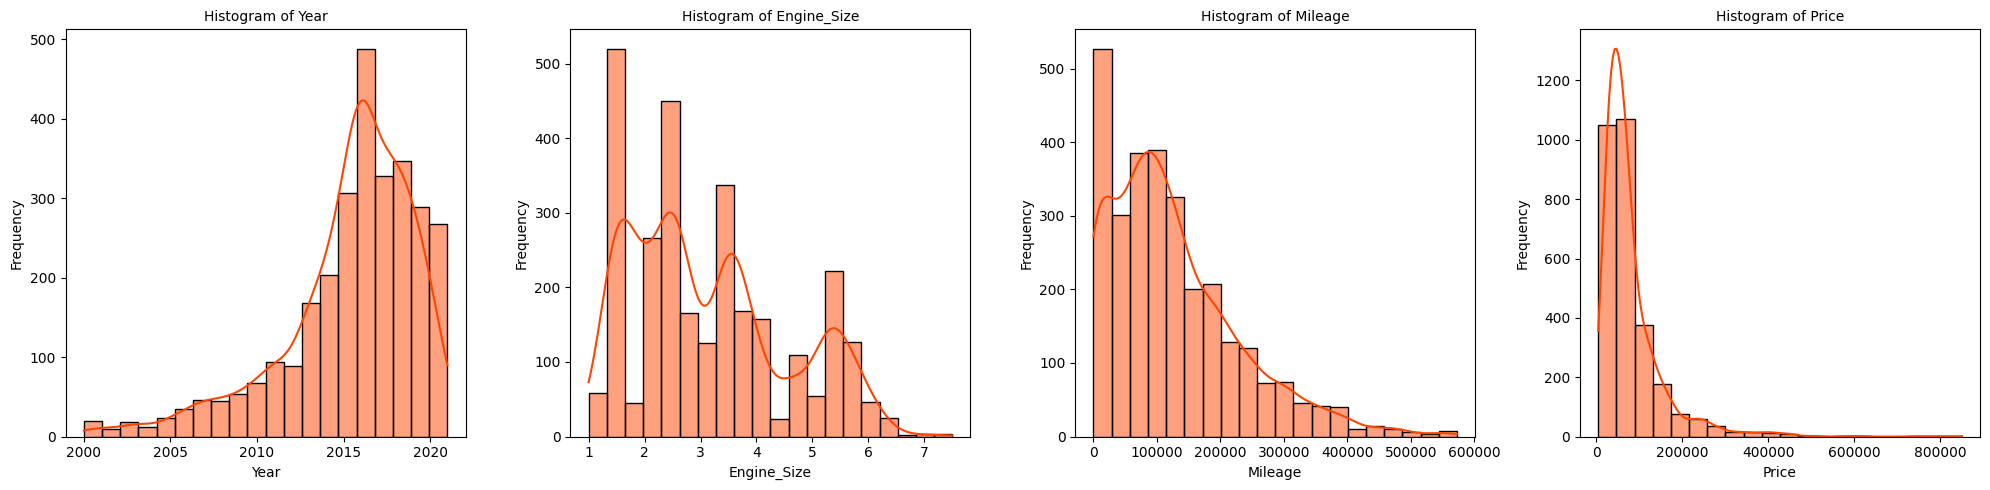

In [406]:
plt.figure(figsize=(20, 5))

for idx, column in enumerate(num_features,start=1):
    sns.histplot(data=df_seen[column], kde=True, bins=20, ax=plt.subplot(1,4,idx), color='orangered')
    plt.subplot(1,4,idx).set_title(f'Histogram of {column}', fontsize=10)
    plt.subplot(1,4,idx).set_xlabel(column)
    plt.subplot(1,4,idx).set_ylabel('Frequency')
plt.tight_layout()
plt.show()

based on the histogram chart above:
- **"Year", "Engine_Size", "Mileage", and "Price"** has a **non-normal distribution**.
- The histogram shows **positive skewness** in the variables **"Engine_Size", "Mileage", and "Price"**. This shows that some of the values are smaller than the average.
- The histogram shows **negative skewness** in the variables **"Year"**. This shows that some of the values are Higher than the average.

**Handling**:
To address the issue of non-normal distribution in numerical data, a **robust scaler** can be employed.

**Categorical data**

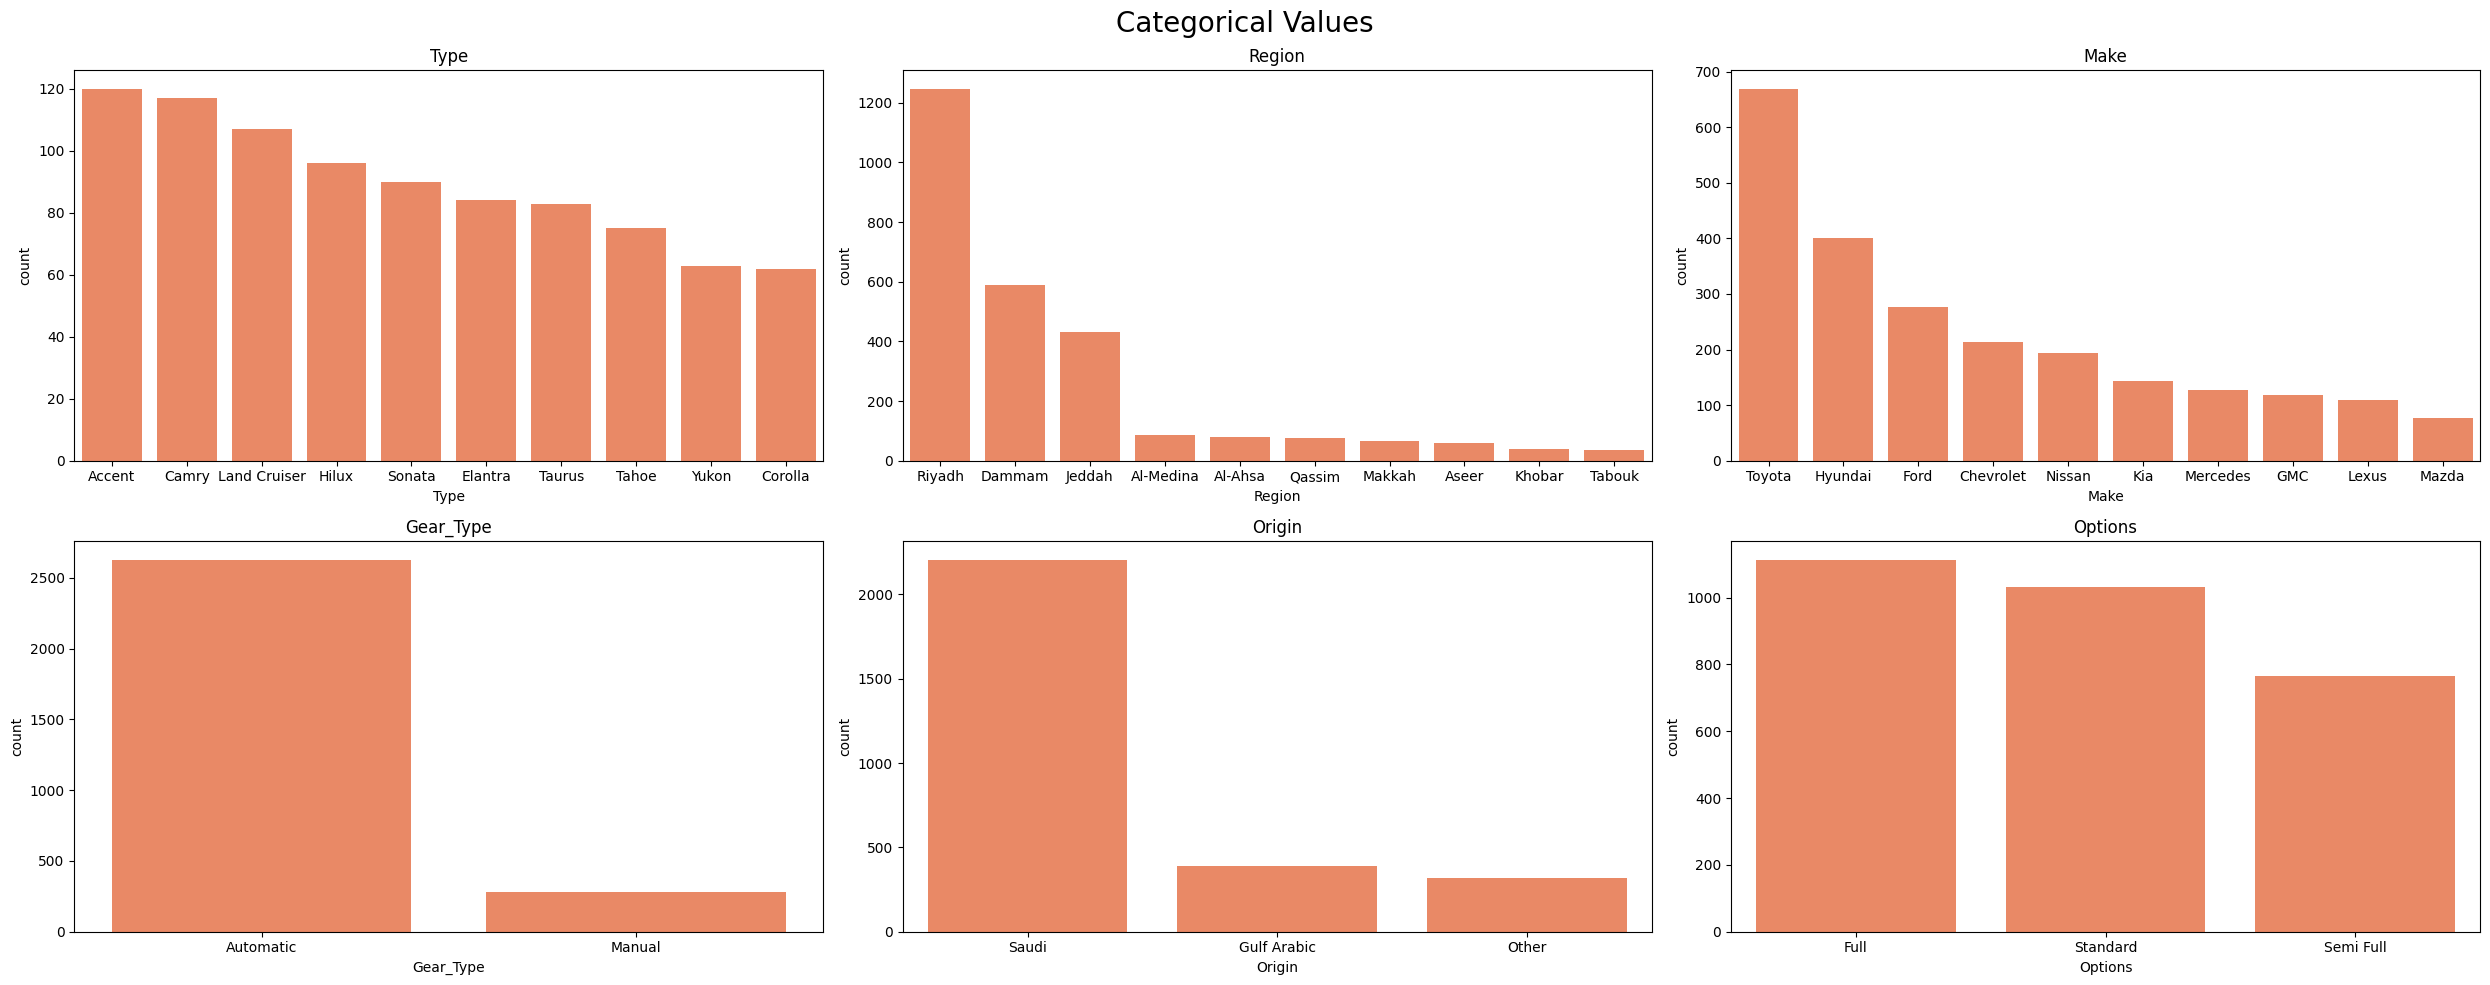

In [407]:
cat_feature= df_seen.select_dtypes(include='object').columns
plt.figure(figsize= (25,10))

for idx, column in enumerate(cat_feature):
      plt.subplot(2,3,idx+1)
      top_categories = df_seen[column].value_counts().head(10).index 
      ax = sns.countplot(data= df_seen, x= df_seen[column],
                         order= top_categories, color='coral')
      plt.tight_layout()
      plt.title(column)  
plt.suptitle('Categorical Values',fontsize=20)
plt.tight_layout()
plt.show()

from the chart above, we found that <br>
- **the dominance of certain brands and models**:
    - Toyota Camry: This model is very popular and dominates the used car market.
    - Other Popular Brands: Apart from Toyota, some other brands like Hyundai and Ford also have a significant market share.
    - Other Models: Other models such as Sonata, Elantra, and Corolla are also quite popular, although not as much as the Camry.
- **Consumer Preferences**:
    - Automatic Transmission: Most consumers prefer cars with automatic transmissions over manual transmissions.
    - Additional Options: Full options are the most sought-after feature by consumers.
    - Car Origin: The majority of used cars for sale originate from the Saudi region.
- **Geographic Distribution**:
    - Concentration in the Riyadh Region: Most of the data comes from the Riyadh region, indicating that the used car market in this region is quite active.
    - Variations Between Regions: There are significant variations in the number of used cars sold in each region.

In [408]:
cat_feature=['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

for feature in df_seen[cat_feature].columns:
    print (f'total unique values({feature}): {df[feature].nunique()}')
    print(df_seen[feature].value_counts())
    print("")

total unique values(Type): 311
Type
Accent          120
Camry           117
Land Cruiser    107
Hilux            96
Sonata           90
               ... 
Stinger           1
Montero2          1
i40               1
Milan             1
Ertiga            1
Name: count, Length: 287, dtype: int64

total unique values(Region): 27
Region
Riyadh            1246
Dammam             588
Jeddah             432
Al-Medina           87
Al-Ahsa             81
Qassim              77
Makkah              65
Aseer               60
Khobar              39
Tabouk              37
Taef                34
Jazan               28
Abha                19
Jubail              19
Hail                15
Al-Baha             13
Najran              13
Yanbu               11
Hafar Al-Batin      11
Al-Jouf             10
Al-Namas             8
Wadi Dawasir         4
Qurayyat             4
Arar                 3
Sakaka               3
Besha                2
Sabya                1
Name: count, dtype: int64

total unique valu

if you see above that there is a numerical column that is resolved in different ways, the method are:
- **OneHotEncoder**: ['Gear_Type', 'Origin', 'Options'] -> because there are not too many values in the column (2-3 Values)
- **BinaryEncoder**: ['Type','Make', 'Region'] -> because there are many values in the column (+5 Values)

- Due to the presence of classes with a very small number of data points **(rare labels)**, a special **handling technique** will be applied to these classes. **The results will be compared to a model that does not employ this technique**.

### **5.2 Correlation features**

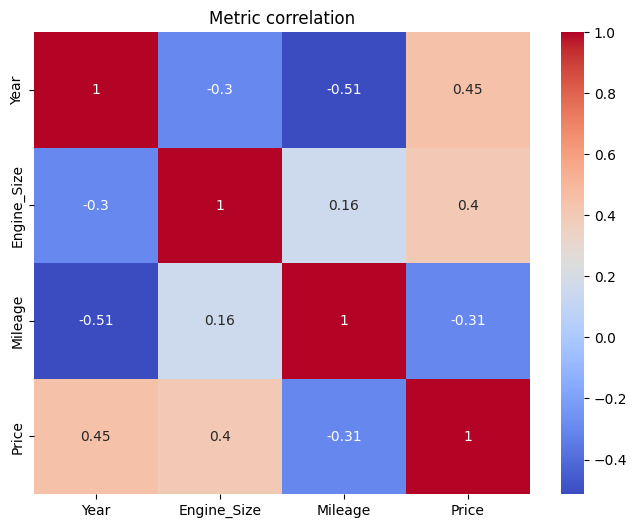

In [409]:
num_feature= df_seen.select_dtypes('number')

plt.figure(figsize=(8, 6))
sns.heatmap(num_feature.corr('spearman'), annot=True, cmap='coolwarm')
plt.title("Metric correlation", size=12)
plt.show()

Based on the correlation matrix above, it can be seen:
1. There is a **positive correlation between Year and Price of 0.45**. This shows that the **newer the year of the car, the higher the price tends** to be;
2. There is a **negative correlation between Price and Mileage of -0.31**. This shows that the **greater the Mileage, the lower the price tends** to be;
3. There is a **negative correlation between Year and Mileage of -0.51**. This shows that the n**ewer the year of the car, the lower the mileage**.

### **5.3 Relationship**

In [410]:
num_fitur= df_seen.select_dtypes('number')
fitur = num_fitur.drop('Price', axis=1).columns
target = 'Price'
sm_lm = sm.OLS(df_seen[target], sm.add_constant(df_seen[fitur]))
result = sm_lm.fit()

In [411]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     519.3
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          3.58e-270
Time:                        00:17:11   Log-Likelihood:                -36118.
No. Observations:                2910   AIC:                         7.224e+04
Df Residuals:                    2906   BIC:                         7.227e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.62e+07   6.96e+05    -23.265      

- R-squared: 0.349. This indicates that 34.9% of the variance in the dependent variable (Price) is explained by the independent variables (Year, Engine_Size, and Mileage) in the model.
- Adjusted R-squared: 0.348. This is a modified version of R-squared that accounts for the number of predictors in the model. It helps to avoid overfitting.
F-statistic: 519.3. This statistic tests the overall significance of the model. The associated p-value (3.58e-270) is very small, strongly suggesting that at least one of the independent variables is significantly related to the price.
- Individual Variable Significance
    - Coefficients: The table shows the estimated coefficients for each independent variable.
    - Intercept (const): -1.62e+07. This represents the predicted price when all the independent variables are zero. However, as noted in the "Notes" section, the condition number is large, which might indicate multicollinearity or other numerical issues.
    - Year: 8046.5545. This suggests that, on average, the price increases by approximately $8,046.55 per year.
    - Engine_Size: 2.468e+04. This indicates that, on average, an increase in engine size is associated with an increase in price of about $24,680.
    - Mileage: -0.1060. This suggests that, on average, an increase in mileage is associated with a decrease in price of about $0.11.
- P-values: The p-values for each variable are all very small (less than 0.05), indicating that each variable is statistically significant in predicting the price.

## **Section 6. Data Preparation**

Based on the analysis in EDA, the following preprocessing tasks will be applied to prepare the dataset for further analysis or modeling. Each step is designed to address specific characteristics of the data, ensuring it is well-processed for optimal performance.

**1. Encoding**<br>
Encoding is the process of converting categorical data into numerical form so that it can be used by machine learning models. <br>
Method encoding :
- **One Hot encoder** : One-Hot Encoding is an encoding technique where each category in a categorical column is converted into a separate binary column. usually used for columns with few unique values.
- **Binary Encoder**: Binery Encoding is an encoding technique that combines label encoding and binary representation. usually used for columns with many unique values.
- **Ordinal Encoder** : Ordinal Encoding is an encoding technique in which categories are converted into numbers according to their order. usually used for ordinal values.

We will apply encoding to transform categorical variables into numerical representations as follows:
- **One Hot Encoder** will be used for small values:
    - 'Gear_Type' : because there are only 2 values [Automatic, Manual]
    - 'Origin' : because there are only 3 values [Saudi, Gulf Arabic, Other]
    - 'Options' : because there are only 3 values [Full,Standart, Semi-Full]
- **Binary Encoder** will be used for many values:
    - 'Type' : because types have 311 different values.
    - 'Make' : because types have 55 different values.
    - 'Region' : because types have 27 different values.

**2. Scaling**<br>
Scaling is the process of rescaling numerical features so that all features have a comparable range of values. <br>
method scaling :
- **Z-Score Scaling (Standardization)** : Z-Score Scaling standardizes data so that it has a mean of 0 and a standard deviation of 1. Values are measured in units of standard deviation from the mean. used when data is normally distributed
$$
z = \frac{x-\mu}{\sigma}
$$
- **Min Max Scaling** : Min-Max Scaling maps data values to the range [0, 1] (or another specified range). usually used for data that does not have extreme outliers.
$$
x' = \frac{x-xmin}{xmax-xmin}
$$
- **Robust Scaling** : Robust scaling uses the median and Interquartile Range (IQR) to scale the data, making it more resistant to outliers. usually used when data is not normally distributed and has outliers
$$
x' = \frac{x-median}{IQR}
$$



We will apply **RobustScaler** to the following numerical features:

- 'Engine_Size'
- 'Mileage'
- 'Year'

robust scaler is chosen because the data contains a **large number of outliers**, and all numeric columns have a **non-normal distribution**.

**3. Rare label Method** <br>
Rare label handling is the process of handling categories that rarely appear in the data to avoid problems in model training.

we use the **Rare label method** to deal with columns that have only few value (values<10):
- 'Type' : ertiga value only have one and There are many more.
- 'Make' : lifan value only have one and There are many more.
- 'Region' :sabya value only have one and There are many more.

The way the rare label method works is by uniting a few values into one. then the results will be compared with methods that do not use rarelabels.

### **6.1 Initialization**

**Initialization Funcation**

- function for the **rare label method whose (values < 10)**

In [412]:

class RareLabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        """
        Initialize the Rare Label Transformer.
        
        Parameters:
        threshold (int): The frequency threshold for values considered as 'Others'.
        """
        
        self.threshold = threshold
        self.unique_values = None

    def fit(self, X, y=None):
        """
        Fit the transformer to the data, calculating the frequency of unique values in each column.
        
        Parameters:
        X (pandas.DataFrame or pandas.Series): The data to fit the transformer.
        y (optional): Target labels (not used in this transformer).
        
        Returns:
        self: The transformer object that has been fitted.
        
        Raises:
        ValueError: If the input is not a pandas.DataFrame or pandas.Series.
        """

        if isinstance(X, pd.DataFrame):
            self.unique_values = {col: X[col].value_counts() for col in X.columns}
        elif isinstance(X, pd.Series):
            self.unique_values = X.value_counts()
        else:
            raise ValueError("Input harus berupa pd.DataFrame atau pd.Series")
        return self

    def transform(self, X):
        """
        Transform the data based on the frequency of unique values, replacing infrequent values with 'Others'.
        
        Parameters:
        X (pandas.DataFrame or pandas.Series): The data to transform.
        
        Returns:
        pandas.DataFrame or pandas.Series: The transformed data.
        
        Raises:
        ValueError: If the input is not a pandas.DataFrame or pandas.Series.
        """

        X_transformed = X.copy()

        if isinstance(X_transformed, pd.DataFrame):
            for col in X_transformed.columns:
                if col in self.unique_values:
                    X_transformed[col] = X_transformed[col].apply(
                        lambda x: 'Others' if self.unique_values[col].get(x, 0) <= self.threshold else x
                    )
        elif isinstance(X_transformed, pd.Series):
            X_transformed = X_transformed.apply(
                lambda x: 'Others' if self.unique_values.get(x, 0) <= self.threshold else x
            )
        else:
            raise ValueError("Input harus berupa pd.DataFrame atau pd.Series")

        return X_transformed

    def get_feature_names_out(self, input_features=None):
        """
        Returns the feature names after transformation.
        
        Parameters:
        input_features (optional): List of input feature names (not used in this transformer).
        
        Returns:
        list: List of input feature names after transformation (currently unchanged).
        """
         
        return input_features if input_features is not None else []


**Define Feature and Target**

In [413]:
#training data
X_train= df_train.drop(['Price'],axis=1)
y_train = df_train['Price']

#test data
X_test= df_test.drop(['Price'],axis=1)
y_test = df_test['Price']

In [414]:
#training data
print("training data feature shape: ",X_train.shape)
print("training data target shape: ",y_train.shape)

#test data
print("test data feature shape: ",X_test.shape)
print("test data target shape: ",y_test.shape)


training data feature shape:  (2328, 9)
training data target shape:  (2328,)
test data feature shape:  (582, 9)
test data target shape:  (582,)


### **6.2 Data Transformation (Feature Engineering)**

In this project, I tried two transformer objects:
1. **"trasnformer1"** : without rare label method
2. **"trasnformer2"** : with rare label method

In [415]:
transformer1 = ColumnTransformer(transformers=[
    ('scaling_preprocessing', RobustScaler(), ['Engine_Size', 'Mileage', 'Year']),
    ('onehot_preprocessing', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('binary_preprocessing',BinaryEncoder(),['Type','Make', 'Region'])
], remainder='passthrough', verbose_feature_names_out=False)

#alt transformation
pipe_binary = Pipeline(steps=[
    ('rare_label', RareLabelTransformer(threshold=10)),
    ('encoding_binary', BinaryEncoder())
])


transformer2 = ColumnTransformer(transformers=[
    ('scaling_preprocessing', RobustScaler(), ['Engine_Size', 'Mileage', 'Year']),
    ('onehot_preprocessing', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('binary_preprocessing',pipe_binary,['Type','Make', 'Region'])
], remainder='passthrough', verbose_feature_names_out=False)

**Transformer 1**



In [416]:
transformer1.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_preprocessing', RobustScaler(),
                                 ['Engine_Size', 'Mileage', 'Year']),
                                ('onehot_preprocessing',
                                 OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary_preprocessing', BinaryEncoder(),
                                 ['Type', 'Make', 'Region'])],
                  verbose_feature_names_out=False)

**Transformer 2**

In [417]:
transformer2.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_preprocessing', RobustScaler(),
                                 ['Engine_Size', 'Mileage', 'Year']),
                                ('onehot_preprocessing',
                                 OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary_preprocessing',
                                 Pipeline(steps=[('rare_label',
                                                  RareLabelTransformer()),
                                                 ('encoding_binary',
                                                  BinaryEncoder())]),
                                 ['Type', 'Make', 'Region'])],
                  verbose_feature_names_out=False)

### **6.3 Overview**
- check data after transformation
- check total feature after transformation
- check multicolinearity with VIF and correlation matrix

**What is FIV?**

VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. It is calculated for each independent variable in the model.

$$
VIF_i = \frac{1}{1 - R^2_i}
$$

Where:
- \(VIF_i\): Variance Inflation Factor for the \(i\)-th variable.
- \(R^2_i\): Coefficient of determination for the \(i\)-th variable regressed on all other variables.

**Interpret VIF Values:**
- VIF<5: Low multicollinearity, no concerns.
- 5≤VIF<10: Moderate multicollinearity, warrants attention.
- VIF≥10: High multicollinearity, corrective actions are needed.

**Handling Multicollinearity**
If multicollinearity is detected using VIF, you can address it through several methods:
- **Remove highly correlated variables**: Drop one of the variables causing multicollinearity.
- **Use regularization techniques**: Apply Ridge Regression or Lasso Regression to reduce multicollinearity effects.
- **Combine variables**: Merge correlated variables into a single composite variable (e.g., through principal component analysis).

**1. Overview Transformer 1 Without rare label method**

In [418]:
## Overview result after transformation

X_train_pre1 = transformer1.transform(X_train)
X_test_pre1 = transformer1.transform(X_test)

# DataFrame
X_train_pre1 = pd.DataFrame(X_train_pre1, columns=transformer1.get_feature_names_out())
X_test_pre1 = pd.DataFrame(X_test_pre1, columns=transformer1.get_feature_names_out())

In [419]:
X_test_pre1

,Engine_Size,Mileage,Year,Gear_Type_Manual,Origin_Other,Origin_Saudi,Options_Semi Full,Options_Standard,Type_0,Type_1,...,Make_1,Make_2,Make_3,Make_4,Make_5,Region_0,Region_1,Region_2,Region_3,Region_4
0,-0.15,-0.059900,0.00,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.95,-0.338462,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.05,-0.415385,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.10,3.376662,-0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.40,2.038462,-1.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.65,-0.762308,1.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
578,-0.60,-0.376923,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
579,-0.10,0.009885,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
580,-0.65,-0.494231,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [420]:
print('total columns after transformation 1:',X_train_pre1.shape[1])

total columns after transformation 1: 28


Detecting Multicollinearity with VIF for transformer 1

In [421]:
X_const = add_constant(X_train_pre1)

vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns  # Nama variabel
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# show values of VIF
print(vif_data)

             Variable        VIF
0               const  31.511015
1         Engine_Size   1.362441
2             Mileage   1.462176
3                Year   1.642699
4    Gear_Type_Manual   1.271754
5        Origin_Other   1.767998
6        Origin_Saudi   1.770654
7   Options_Semi Full   1.309619
8    Options_Standard   1.545054
9              Type_0   1.042395
10             Type_1   1.302898
11             Type_2   1.186955
12             Type_3   1.168403
13             Type_4   1.117910
14             Type_5   1.187700
15             Type_6   1.114029
16             Type_7   1.144382
17             Type_8   1.118501
18             Make_0   1.256128
19             Make_1   1.278899
20             Make_2   1.221392
21             Make_3   1.568914
22             Make_4   1.484883
23             Make_5   1.236951
24           Region_0   1.041098
25           Region_1   1.138441
26           Region_2   1.074057
27           Region_3   2.367477
28           Region_4   2.255096


This model (transformer 1) does not have significant multicollinearity problems, as all VIF values are below 5, with most even below 2. Therefore, this model can be trusted to make predictions because the variables used stand independently and do not significantly influence each other.

**2. Overview Transformer 2 With rare label method**

In [422]:
## Overview result after transformation

X_train_pre2 = transformer2.transform(X_train)
X_test_pre2 = transformer2.transform(X_test)

# DataFrame
X_train_pre2 = pd.DataFrame(X_train_pre2, columns=transformer2.get_feature_names_out())
X_test_pre2 = pd.DataFrame(X_test_pre2, columns=transformer2.get_feature_names_out())

In [423]:
X_test_pre2

,Engine_Size,Mileage,Year,Gear_Type_Manual,Origin_Other,Origin_Saudi,Options_Semi Full,Options_Standard,Type_0,Type_1,...,Make_0,Make_1,Make_2,Make_3,Make_4,Region_0,Region_1,Region_2,Region_3,Region_4
0,-0.15,-0.059900,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.95,-0.338462,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.05,-0.415385,0.00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.10,3.376662,-0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.40,2.038462,-1.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.65,-0.762308,1.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
578,-0.60,-0.376923,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
579,-0.10,0.009885,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
580,-0.65,-0.494231,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [424]:
print('total columns after transformation 1:',X_train_pre2.shape[1])

total columns after transformation 1: 24


Detecting Multicollinearity with VIF for transformer 2

In [425]:
X_const = add_constant(X_train_pre2)

vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns  # Nama variabel
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# show values of VIF
print(vif_data)

             Variable        VIF
0               const  34.977713
1         Engine_Size   1.399506
2             Mileage   1.443098
3                Year   1.602132
4    Gear_Type_Manual   1.195344
5        Origin_Other   1.765665
6        Origin_Saudi   1.788549
7   Options_Semi Full   1.306338
8    Options_Standard   1.531465
9              Type_0   1.197280
10             Type_1   1.305573
11             Type_2   1.283142
12             Type_3   1.233937
13             Type_4   1.295041
14             Type_5   1.242407
15             Make_0   1.302360
16             Make_1   1.399644
17             Make_2   1.436569
18             Make_3   1.408083
19             Make_4   1.183803
20           Region_0   1.087016
21           Region_1   1.054994
22           Region_2   1.058377
23           Region_3   2.100924
24           Region_4   2.012020


This model (transformer 2) does not have significant multicollinearity problems, as all VIF values are below 5, with most even below 2. Therefore, this model can be trusted to make predictions because the variables used stand independently and do not significantly influence each other.

## **Section 7. Model Development**

### **7.1 Initialization**

- **Workflow of the experimet to get best model**

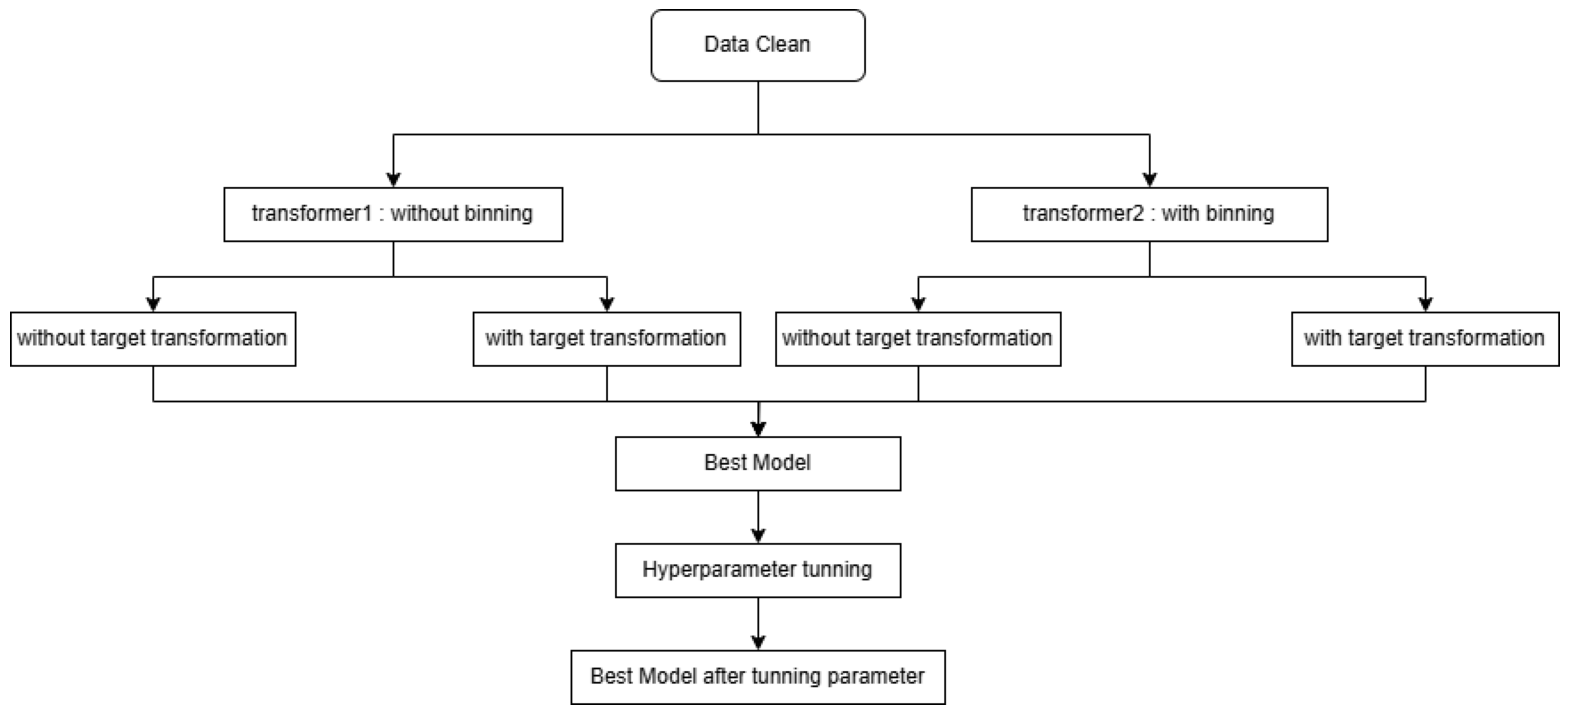

In [426]:
# Load and display an image
plt.figure(figsize=(20, 10))
img = mpimg.imread(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 3. machine learning\Capstone\Predict-used-cars-price-in-Saudi-Arabia-s\assets\Workflow.png')
plt.imshow(img)
plt.axis('off')
plt.show()


- **Initialization Function**

In [427]:


def evaluate_models(X_train, y_train, transformer, list_model, model_names):
    """
    Evaluates multiple models using cross-validation for various performance metrics.

    Parameters:
    - X_train (array-like): The feature set used for training.
    - y_train (array-like): The target variable corresponding to X_train.
    - transformer (sklearn Trans,former): A preprocessing transformer (e.g., scaler, encoder).
    - list_model (list): A list of machine learning models to evaluate.
    - model_names (list): Names of the models in the same order as list_model.

    Returns:
    - pd.DataFrame: A DataFrame containing the mean and standard deviation of various evaluation metrics for each model.
    """

    # Lists to store evaluation results for each metric
    score_rmse = []
    nilai_mean_rmse = []
    nilai_std_rmse = []

    score_mae = []
    nilai_mean_mae = []
    nilai_std_mae = []

    score_mape = []
    nilai_mean_mape = []
    nilai_std_mape = []

    score_r2 = []
    nilai_mean_r2 = []
    nilai_std_r2 = []
    
    # KFold Cross Validation
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    # Loop for model
    for model in list_model:
        # Membuat pipeline dengan preprocessing dan model
        estimator = Pipeline([
            ('preprocessing', transformer),
            ('model', model)
        ])

        # evaluation with RMSE
        model_cv_rmse = cross_val_score(
            estimator, 
            X_train, 
            y_train, 
            cv=crossval, 
            scoring='neg_root_mean_squared_error', 
            error_score='raise'
        )
        score_rmse.append(model_cv_rmse)
        nilai_mean_rmse.append(model_cv_rmse.mean())
        nilai_std_rmse.append(model_cv_rmse.std())

        # evaluation with MAE
        model_cv_mae = cross_val_score(
            estimator, 
            X_train, 
            y_train, 
            cv=crossval, 
            scoring='neg_mean_absolute_error', 
            error_score='raise'
        )
        score_mae.append(model_cv_mae)
        nilai_mean_mae.append(model_cv_mae.mean())
        nilai_std_mae.append(model_cv_mae.std())

        # evaluation with MAPE
        model_cv_mape = cross_val_score(
            estimator, 
            X_train, 
            y_train, 
            cv=crossval, 
            scoring='neg_mean_absolute_percentage_error', 
            error_score='raise'
        )
        score_mape.append(model_cv_mape)
        nilai_mean_mape.append(model_cv_mape.mean())
        nilai_std_mape.append(model_cv_mape.std())

        # Evaluation with R2
        model_cv_r2 = cross_val_score(
            estimator, 
            X_train, 
            y_train, 
            cv=crossval, 
            scoring='r2', 
            error_score='raise'
        )
        score_r2.append(model_cv_r2)
        nilai_mean_r2.append(model_cv_r2.mean())
        nilai_std_r2.append(model_cv_r2.std())

    # Create DataFrame for matrix evaluation
    result_df = pd.DataFrame({
        'Model': model_names,
        'Mean_RMSE': nilai_mean_rmse,
        'Std_RMSE': nilai_std_rmse,
        'Mean_MAE': nilai_mean_mae,
        'Std_MAE': nilai_std_mae,
        'Mean_MAPE': nilai_mean_mape,
        'Std_MAPE': nilai_std_mape,
        'Mean_R2': nilai_mean_r2,
        'Std_R2': nilai_std_r2
    })

    return result_df


### **7.2 Developing the Model Pipeline**

In [428]:
# Create your Pipeline and list process
base_clf = Pipeline(steps=[
    ("Featureengineering", transformer1),
    ("modeling", None)
])

alt_clf = Pipeline(steps=[
    ("Featureengineering", transformer2),
    ("modeling", None)
])

### **7.3 Model Benchmarking (Comparing model base performance)**

In [429]:
model_names = ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor','gradianboosting Regressor','AdaBoost Regressor']

**Without Target Transformation**

In [430]:
dtr=DecisionTreeRegressor(random_state=42)
knnr=KNeighborsRegressor()
linreg=LinearRegression()
rf  = RandomForestRegressor(random_state= 42)
xgb = XGBRegressor(random_state= 42)
gb = GradientBoostingRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)

list_model=[dtr,knnr,linreg,rf,xgb,gb,ada]

**With Target Transformation**

In [431]:
tt_dtr = TransformedTargetRegressor(dtr, func=np.log, inverse_func=np.exp)
tt_knnr = TransformedTargetRegressor(knnr, func=np.log, inverse_func=np.exp)
tt_linreg = TransformedTargetRegressor(linreg, func=np.log, inverse_func=np.exp)
tt_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
tt_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
tt_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
tt_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

list_models=[tt_dtr,tt_knnr,tt_linreg,tt_rf,tt_xgb,tt_gb,tt_ada]

#### **Model 1**
- **Transformer 1** : without rare label method
- **Model** : Without Target transformation

In [432]:
results_m1 = evaluate_models(X_train, y_train, transformer1, list_model, model_names)

In [433]:
results_m1.sort_values(by='Mean_RMSE', ascending=False, inplace=True)
results_m1.reset_index(drop=True, inplace=True)
results_m1

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,XGBoost Regressor,-36677.752329,7965.059973,-18675.497576,2065.133387,-0.273254,0.032643,0.754893,0.074117
1,RandomForest Regressor,-37724.938398,8045.084000,-19049.848531,1969.917511,-0.293167,0.040291,0.743048,0.067408
2,KNN Regressor,-39813.406485,6902.624331,-20705.292906,1292.641097,-0.335389,0.033154,0.711165,0.065274
3,gradianboosting Regressor,-40130.824916,9267.513029,-21591.930682,1929.167374,-0.322533,0.036859,0.706338,0.094402
4,Linear Regression,-48210.530774,9083.467878,-23850.274347,2097.311145,-0.345911,0.043534,0.582491,0.079777
5,DecisionTree Regressor,-53279.459477,7246.709758,-33711.647558,1465.265914,-0.648038,0.054477,0.486503,0.064598
6,AdaBoost Regressor,-66156.069815,4408.307258,-53816.779195,2873.585629,-1.205191,0.140052,0.192983,0.123924


#### **Model 2**
- **Transformer 2** : with rare label method
- **Model** : Without Target transformation

In [434]:
results_m2 = evaluate_models(X_train, y_train, transformer2, list_model, model_names)

In [435]:
results_m2.sort_values(by='Mean_RMSE', ascending=False, inplace=True)
results_m2.reset_index(drop=True, inplace=True)
results_m2

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,XGBoost Regressor,-35487.342857,6979.064046,-17607.407043,1394.778618,-0.264460,0.025341,0.771915,0.057168
1,RandomForest Regressor,-37921.750871,8238.529659,-18667.439529,1406.494375,-0.277906,0.026125,0.740961,0.066994
2,gradianboosting Regressor,-39090.228910,7295.780589,-21617.125663,1280.026693,-0.318952,0.028358,0.722996,0.062629
3,KNN Regressor,-40501.770644,6037.834297,-20825.466745,1053.370620,-0.334178,0.027707,0.703280,0.044297
4,Linear Regression,-52711.446156,8382.274487,-24002.115872,2686.446242,-0.353436,0.030502,0.493003,0.107352
5,DecisionTree Regressor,-53268.200628,6483.465637,-33790.378906,1106.011040,-0.654075,0.049417,0.487053,0.040733
6,AdaBoost Regressor,-68017.881848,4834.998711,-56833.560863,5090.915941,-1.318973,0.203918,0.151450,0.099065


#### **Model 3**
- **Transformer 1** : without rare label Method
- **Model** : With Target transformation

In [436]:
results_m3 = evaluate_models(X_train, y_train, transformer1, list_models, model_names)

In [437]:
results_m3.sort_values(by='Mean_RMSE', ascending=False, inplace=True)
results_m3.reset_index(drop=True, inplace=True)
results_m3

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,XGBoost Regressor,-35000.671797,7824.275236,-17013.633786,1463.803116,-0.224158,0.018611,0.775922,0.068014
1,RandomForest Regressor,-37910.944945,8747.972015,-17903.517478,1814.486754,-0.236372,0.025100,0.739465,0.079928
2,KNN Regressor,-39469.098869,7573.863994,-19706.809461,1325.886399,-0.293239,0.025715,0.717348,0.069589
3,gradianboosting Regressor,-40960.268625,9218.315262,-20067.904553,2190.087081,-0.251495,0.025358,0.695180,0.094035
4,DecisionTree Regressor,-48220.599071,8037.250477,-25556.687477,2087.094285,-0.329327,0.015062,0.578640,0.081347
5,AdaBoost Regressor,-50992.710736,7872.928038,-28971.934848,2523.825803,-0.396257,0.032443,0.530247,0.068733
6,Linear Regression,-52875.717616,10122.629714,-24596.461133,2966.934024,-0.350698,0.049600,0.487645,0.147896


**Model 4**
- Transformer 2 : with Rare Label
- Model : With Target transformation

In [438]:
results_m4 = evaluate_models(X_train, y_train, transformer2, list_models, model_names)

In [439]:
results_m4.sort_values(by='Mean_RMSE', ascending=False, inplace=True)
results_m4.reset_index(drop=True, inplace=True)
results_m4

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,XGBoost Regressor,-34894.875179,7458.096047,-17121.382796,1603.230862,-0.227534,0.025932,0.777941,0.068097
1,RandomForest Regressor,-38706.966675,8354.695982,-17902.613717,1521.111534,-0.232153,0.023931,0.730038,0.070380
2,gradianboosting Regressor,-39508.948120,7508.734008,-19832.471138,1639.887911,-0.247966,0.018074,0.717882,0.062158
3,KNN Regressor,-40133.907103,7564.805541,-19736.787033,1647.407650,-0.285352,0.025142,0.709407,0.061175
4,DecisionTree Regressor,-48986.243264,7739.486089,-26114.977391,1779.748691,-0.334232,0.008699,0.566566,0.070906
5,AdaBoost Regressor,-50486.977199,7505.821883,-28563.181399,2379.684340,-0.387010,0.031609,0.539886,0.058628
6,Linear Regression,-56153.033750,5765.476014,-25652.304417,1693.179048,-0.356051,0.022835,0.419408,0.106451


**Compare Model**

In [440]:
compare_result= pd.DataFrame({'Model 1':results_m1.iloc[0].to_list(),
                              'Model 2':results_m2.iloc[0].to_list(),
                              'Model 3':results_m3.iloc[0].to_list(),
                              'Model 4':results_m4.iloc[0].to_list(),
                               }).T

compare_result.columns = ['Model Name', 'Mean RMSE', ' Std RMSE', 'Mean MAE', ' Std MAE', 'Mean MAPE', 'Std MAPE', 'Mean R2', 'Std R2']
compare_result.sort_values(by='Mean RMSE', ascending=False)

,Model Name,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Mean R2,Std R2
Model 4,XGBoost Regressor,-34894.875179,7458.096047,-17121.382796,1603.230862,-0.227534,0.025932,0.777941,0.068097
Model 3,XGBoost Regressor,-35000.671797,7824.275236,-17013.633786,1463.803116,-0.224158,0.018611,0.775922,0.068014
Model 2,XGBoost Regressor,-35487.342857,6979.064046,-17607.407043,1394.778618,-0.26446,0.025341,0.771915,0.057168
Model 1,XGBoost Regressor,-36677.752329,7965.059973,-18675.497576,2065.133387,-0.273254,0.032643,0.754893,0.074117


- Model 4 performs well overall, especially in terms of RMSE and R-squared.
- Model 3 has competitive MAE and MAPE scores, which may make it preferable depending on the specific evaluation metric prioritized.


Model 4 with XGBoots regressor is chosen because it has the lowest Mean RMSE (-34,894.88), the highest Mean R² (0.7779), and demonstrates consistent performance with low standard deviations across metrics. It offers a good balance of accuracy and stability, making it the most reliable choice.

The next step is to test Model 4 with Xgboots regressor on the testing dataset to validate its performance and ensure the results generalize well.


In [441]:
score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

model = Pipeline([
    ('preprocessing', transformer2),
    ('model', tt_xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))


score_before_tuning = pd.DataFrame(
    {
        "RMSE": score_rmse,
        "MAE": score_mae,
        "MAPE": score_mape,
        "R2": score_r2
    }
)

score_before_tuning


,RMSE,MAE,MAPE,R2
0,28445.21434,14624.803283,0.195095,0.83156


**Model 4 performs better on the testing data** than it did on the training data (cross-validation). This indicates the model is not overfitting and generalizes well to new, unseen data. The lower RMSE, MAE, and MAPE, coupled with a higher R², confirm its robustness and effectiveness. 


Next, hyperparameter tuning will be performed to find the best parameters so that the model's accuracy can be improved.

### **7.4 Tune Model**

**XGBOOTS**

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm based on gradient boosting. It is widely used for supervised learning tasks such as regression, classification, and ranking due to its high performance and flexibility.

**XGBoots Parameter** :
- **max_depth**: Maximum depth of the trees. Controls how complex each tree can be. Larger values make the model more complex but can lead to overfitting.
- **learning_rate**: Step size for updating weights. Smaller values make training slower but can improve generalization.
- **n_estimators**: Number of trees (boosting rounds). More trees can improve accuracy but increase training time.
- **subsample**: Proportion of training data used to grow each tree. Helps prevent overfitting.
- **gamma**: Minimum loss reduction required to split a node.Larger values make the model more conservative.
- **colsample_bytree**: Fraction of features used to build each tree. Controls feature sampling.
- **reg_alpha**: L1 regularization term. Regularizes the model by adding a penalty term for the absolute value of the coefficients.


In [442]:
hyperparam = {
    "modeling__regressor__max_depth": [3,5,7,9],
    "modeling__regressor__learning_rate":  [0.1,0.5,0.9],
    "modeling__regressor__n_estimators": [100, 250, 500],
    "modeling__regressor__subsample":  [0.1,0.5,0.9],
    "modeling__regressor__gamma": [0,5,10],
    "modeling__regressor__colsample_bytree": [0.1,0.5,0.9],
    "modeling__regressor__reg_alpha": [0.01,0.1,1]
}

clf_xgb = Pipeline(steps=[
    ('Featureengineering', transformer2),
    ('modeling',tt_xgb)
])


tuning_xgb = GridSearchCV(
    estimator = clf_xgb,
    param_grid= hyperparam,
    cv = KFold(n_splits=5, shuffle=True, random_state=42),
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
    verbose = 1,
)

tuning_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


c:\Users\ghais\anaconda3\envs\jcds0412\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-58652.67993913 -57847.47879369 -58020.24323176 ... -57492.14087804
 -50303.43992208 -48863.69802948]
  warnings.warn(
c:\Users\ghais\anaconda3\envs\jcds0412\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-29341.03929148 -28408.77957877 -28309.70554389 ... -32196.03912247
 -27280.80409858 -26486.34093433]
  warnings.warn(
c:\Users\ghais\anaconda3\envs\jcds0412\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-0.38794917 -0.36650241 -0.36353034 ... -0.41988046 -0.34653948
 -0.34492796]
  warnings.warn(
c:\Users\ghais\anaconda3\envs\jcds0412\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.38148421 0.39866873 0.3951134

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Featureengineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
                         'modeling__regressor__learning_rate': [0.1, 0.5, 0.9],
                         'modeling__regressor__max_depth': [3, 5, 7, 9],
                         'modeling__regressor__n_estimators': [100, 250, 500],
                         'modeling__regressor__reg_alpha': [0.01, 0.1, 1],
                         'modeling__regressor__subsample': [0.1, 0.5, 0.9]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [443]:
tuning_xgb.best_params_

{'modeling__regressor__colsample_bytree': 0.9,
 'modeling__regressor__gamma': 0,
 'modeling__regressor__learning_rate': 0.5,
 'modeling__regressor__max_depth': 3,
 'modeling__regressor__n_estimators': 250,
 'modeling__regressor__reg_alpha': 0.01,
 'modeling__regressor__subsample': 0.9}

In [444]:
tuning_xgb.best_score_

np.float64(-32480.908886983547)

**Camparison result in train data (before and after tuning)**

- **RMSE (Before tuning)** : -34894.875179
- **RMSE (After tuning)** : -32480.908886983547

**increase up to 2000+ after tuning in data training**

### **7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

#### **1. Evaluate model on data testing**

In [445]:
# Model XGBoost
xgb_model = {"XGB_1" : tt_xgb}

# Define model with the best estimator
xgb_tuning = tuning_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning, 
    "MAE": mae_xgb_tuning, 
    "MAPE": mape_xgb_tuning,
    "R2": r2_xgb_tuning
    },
    index=xgb_model.keys()
)

score_after_tuning

,RMSE,MAE,MAPE,R2
XGB_1,27824.129488,15575.985373,0.208206,0.838835


In [446]:
#compare_result
pd.concat([score_before_tuning, score_after_tuning]).rename(index={0:'Before Tuning', 'XGB_1':'After Tuning'})    

,RMSE,MAE,MAPE,R2
Before Tuning,28445.214340,14624.803283,0.195095,0.831560
After Tuning,27824.129488,15575.985373,0.208206,0.838835


- After hyperparameter tuning, the model's RMSE and MAE have decreased, showing that the model's predictions are more accurate.
- The R² value has increased, indicating an improvement in the model's ability to explain the variance in the target variable.
- The slight increase in MAPE is negligible and does not significantly affect overall performance.

Overall, the hyperparameter tuning successfully improved the model's accuracy and predictive power.

#### **2. Residual analisis**

Residual analysis is the process of analyzing residuals in a statistical or machine learning model to evaluate model performance and validate underlying assumptions. Residuals are the difference between the actual value:
$$
Residual = Actual - Predict 
$$

**Residual Plot**

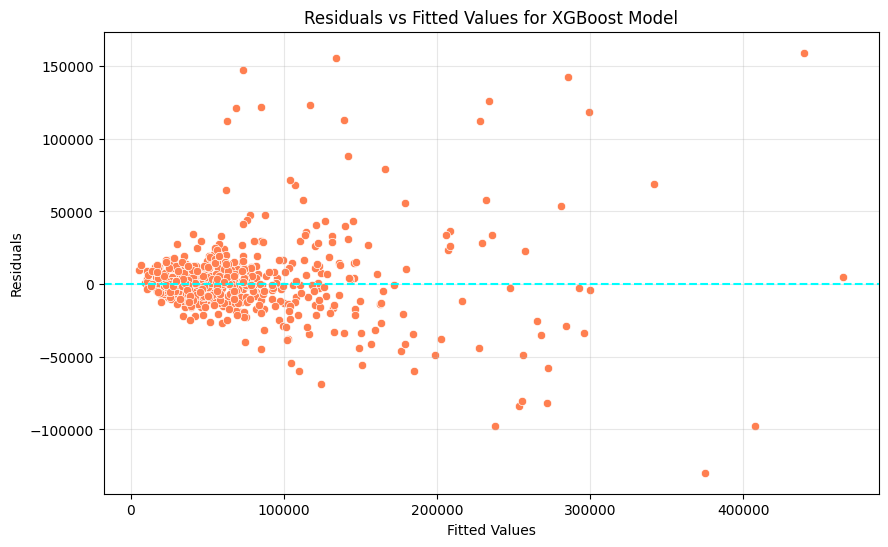

In [447]:
residuals = y_test - y_pred_xgb_tuning

# Create a scatter plot of residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb_tuning, y=residuals, color='coral')
plt.axhline(y=0, color='aqua', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for XGBoost Model')
plt.grid(True, alpha=0.3)
plt.show()

**Insight**
- Heteroscedasticity: The residuals appear to spread out as the predicted values increase, indicating that the variance of the errors grows with larger predictions. This suggests that the model may have difficulty maintaining consistent accuracy for higher predicted values. Applying a transformation (log transformation) or performing additional feature engineering could help address this issue.
- Outliers: Some extreme residual values with significant positive or negative errors are visible in the plot. These outliers could represent anomalies in the data or areas where the model struggles. Investigating these points further may provide insights for improving the model.
- Centered around Zero: Most residuals are centered around zero, indicating that the model is unbiased and does not systematically overestimate or underestimate the target values. This is a positive indication of the model's overall performance.

Overall, while the residual plot highlights some issues, particularly with heteroscedasticity and outliers, the model performs reasonably well. Addressing these challenges could further enhance the model's predictive performance.

**Distribution of Residuals**

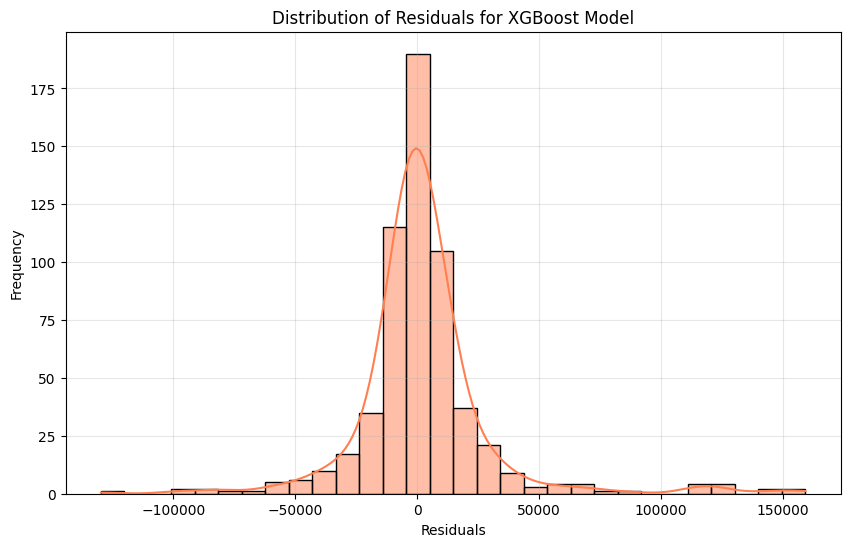

In [448]:
# Create a histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='coral')
plt.title('Distribution of Residuals for XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


**Insight**

- From the "Distribution of Residuals" histogram, it can be seen that the residuals are centered around zero.
- The sharp peak in the residual plot indicates that most of the residuals (prediction errors) are very close to zero.

**Actual Vs Predicted Price**

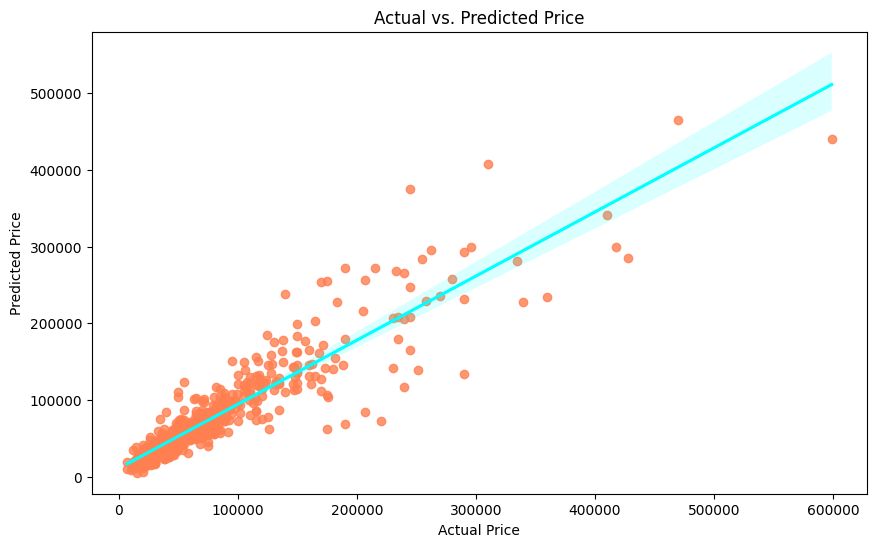

In [449]:
plt.figure(figsize=(10, 6))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning, color="coral",line_kws={"color": "aqua"}).set(title="Actual vs. Predicted Price", 
                                               xlabel="Actual Price", 
                                               ylabel="Predicted Price");

**Insight**
- The plot demonstrates that the model performs well overall, with predictions closely matching actual values for most cases.
- However, there is room for improvement in handling higher actual prices and reducing outliers.

**Q-Q Plot of Residuals**

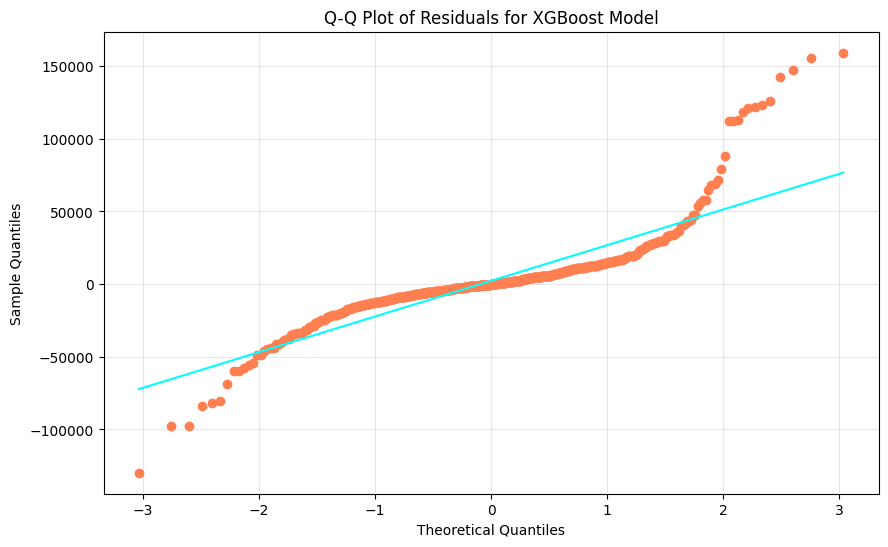

In [450]:
# Create a Q-Q plot of the residuals
plt.figure(figsize=(10, 6))
ax = plt.gca()
stats.probplot(residuals, dist="norm", plot=ax)

lines = ax.get_lines()
lines[1].set_color('aqua')  # line fit Q-Q plot (index 1)
lines[0].set_color('coral')

plt.title('Q-Q Plot of Residuals for XGBoost Model')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, alpha=0.3)
plt.show()

**Insight**

In the visualization "Q-Q Plot of Residuals," it can be seen that the points at the tails (the lower and upper ends) begin to deviate from the red line, especially in the lower-left (negative residual values) and upper-right (positive residual values). This indicates that the residuals are not entirely normal, particularly in the tails of the distribution, which could suggest the presence of outliers.

#### **3. Leaning curve inspection**

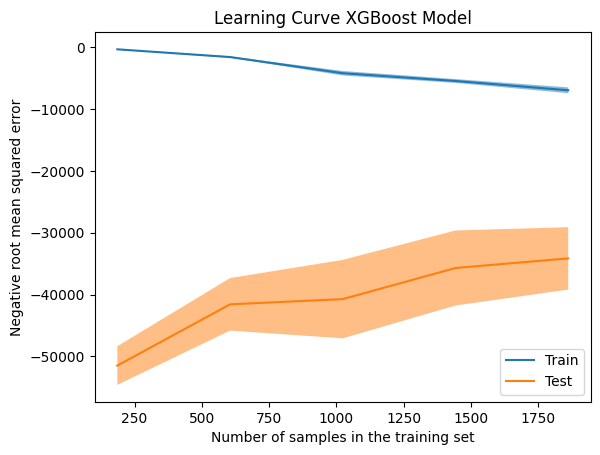

In [451]:
LearningCurveDisplay.from_estimator(clf_xgb, X_train, y_train, scoring='neg_root_mean_squared_error')
plt.title("Learning Curve XGBoost Model")
plt.show()

- With only ~250 samples, the test error is around -50,000, and the gap between train and test error is large, showing poor generalization.
- As the training size increases to ~1750 samples, the test error improves to -30,000, with the gap narrowing to around -20,000, and the variability in test error reducing.

The graph suggests that the model performs better with more data, as both training and test errors converge, leading to more consistent predictions.

### **7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

#### **1. Feature importance**

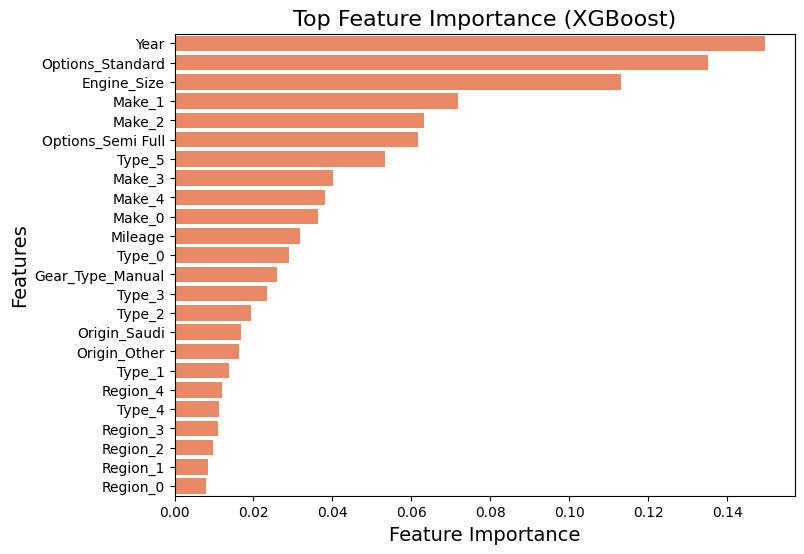

In [452]:
best_pipeline = tuning_xgb.best_estimator_

# Ambil langkah model dari pipeline
xgb_model = best_pipeline.named_steps['modeling']

# Jika model menggunakan TransformedTargetRegressor, ambil model internalnya
if hasattr(xgb_model, 'regressor_'):
    xgb_model = xgb_model.regressor_

# Ambil feature importances
feature_importances = xgb_model.feature_importances_

# Ambil nama fitur dari transformer
feature_names = transformer2.get_feature_names_out()

# Buat DataFrame untuk visualisasi
feature_imp = pd.DataFrame({
    "Features": feature_names,
    "Value": feature_importances
}).sort_values("Value", ascending=False)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_imp, x="Value", y="Features",color='coral')
plt.title("Top Feature Importance (XGBoost)", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()


**Insight**

- **Top Features Drive Predictions**: The top few features (Options_Standard, Year, Engine_Size) dominate the model's predictive power, indicating that focusing on these features is crucial for the accuracy of the model.
- **Lower Impact Features**: Features with low importance (Region features) may not contribute much to the model and could potentially be removed to simplify the model without significantly affecting performance.

#### **2. SHAP value identification**

In [453]:

shap.initjs()

model = clf_xgb.named_steps['modeling'].regressor_
preprocessor = clf_xgb.named_steps['Featureengineering']

X_train_pre = preprocessor.transform(X_train)
X_train_pre_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())

X_test_pre = preprocessor.transform(X_test)
X_test_pre_df = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())

In [454]:
explainer = shap.TreeExplainer(model=model,
                                data=X_train_pre_df,
                                feature_names=preprocessor.get_feature_names_out())

In [455]:
shap_values = explainer.shap_values(X_train_pre)

 99%|===================| 2305/2328 [00:21<00:00]        

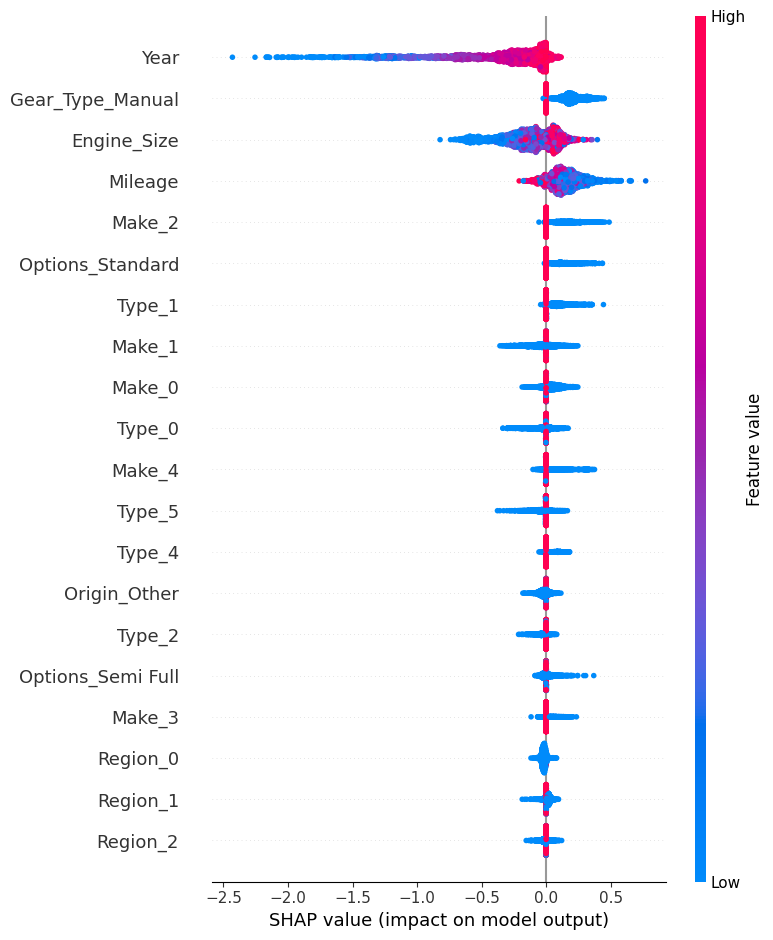

In [456]:
shap.summary_plot(shap_values, X_train_pre, feature_names=preprocessor.get_feature_names_out())


**Insight**
- **Year Is the Most Important Feature**: It has the largest range of SHAP values, meaning it strongly influences the predictions. High Year values positively impact predictions.
- **Other Significant Features**: Features like Gear_Type_Manual, Engine_Size, Mileage, and Make_2 are also influential, with noticeable SHAP value spreads.
- **Less Important Features**: Features like Region_2, Region_1, and Region_0 have minimal SHAP values, meaning they have little to no impact on the model's predictions.

## **Section 8. Model Deployment**

In [458]:
filename = 'XGBoost-v1-0.83.sav'
pickle.dump(xgb_tuning, open(filename, 'wb'))

In [461]:
# import model
clf = pickle.load(open('XGBoost-v1-0.83.sav', 'rb'))
clf

Pipeline(steps=[('Featureengineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_preprocessing',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Year']),
                                                 ('onehot_preprocessing',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_preprocessing',
                                                  Pipeline(steps=[('rare_label',
                                                                   RareLabelTransformer()),
                                                                  ('encoding_binary'...
                                                                   gamma=0,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.5,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=250,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)))])

In [462]:
X_seen= df_seen.drop(['Price'],axis=1)
y_seen = df_seen['Price']

print("feature shape: ",X_seen.shape)
print("target shape: ",y_seen.shape)

feature shape:  (2910, 9)
target shape:  (2910,)


In [463]:
clf.fit(X_seen, y_seen)

Pipeline(steps=[('Featureengineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_preprocessing',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Year']),
                                                 ('onehot_preprocessing',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_preprocessing',
                                                  Pipeline(steps=[('rare_label',
                                                                   RareLabelTransformer()),
                                                                  ('encoding_binary'...
                                                                   gamma=0,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.5,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=250,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)))])

In [464]:
# Make predictions on the useen data
y_pred_seen = clf.predict(X_seen)

# Calculate metrics for the seen data
rmse_seen = np.sqrt(mean_squared_error(y_seen, y_pred_seen))
mae_seen = mean_absolute_error(y_seen, y_pred_seen)
mape_seen= mean_absolute_percentage_error(y_seen, y_pred_seen)
r2_seen = r2_score(y_seen, y_pred_seen)

# Print the results
score_seen = pd.DataFrame(
    {
    "RMSE": rmse_seen, 
    "MAE": mae_seen, 
    "MAPE": mape_seen,
    "R2": r2_seen
    },index=['Seen Data'])

score_seen

,RMSE,MAE,MAPE,R2
Seen Data,20280.497875,10400.536764,0.12535,0.924241


**Metrics:**
- RMSE (Root Mean Squared Error):
    - Value: 13,980.66
    - This metric measures the average magnitude of prediction errors in the same units as the target variable. A lower RMSE indicates better accuracy.
    - On the seen data, the RMSE is relatively low, which suggests the model fits the training data well.

- MAE (Mean Absolute Error):
    - Value: 6,964.81
    - This metric measures the average of the absolute differences between predicted and actual values. Like RMSE, a lower MAE indicates better performance.
    - The MAE is lower than the RMSE, which is expected because RMSE penalizes larger errors more than MAE.

- MAPE (Mean Absolute Percentage Error):
    - Value: 0.1955 (19.55%)
    - MAPE indicates the average percentage error relative to the actual values. For example, on average, the model’s predictions are 19.55% off from the actual values.
    - A MAPE below 20% generally indicates a good model, depending on the domain.

- R² (R-Squared):
    - Value: 0.9640
    - This metric represents the proportion of variance in the target variable explained by the model.
    - An R² value of 0.9640 means the model explains approximately 96.4% of the variance in the target variable, which indicates excellent performance on the training data.


In [479]:
predictions = clf.predict(df_seen)
predicted_prices = predictions

std_residuals = np.std(residuals)

# Calculate prediction intervals
lower_bound = predicted_prices - 1.96 * std_residuals
upper_bound = predicted_prices + 1.96 * std_residuals

# Display prediction ranges
for i, price in enumerate(predicted_prices):
    print(f"Car {i+1}: Predicted Price = {price}, Range Price= [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")

Car 1: Predicted Price = 61003.953125, Range = [6644.30, 115363.60]
Car 2: Predicted Price = 48370.05859375, Range = [-5989.59, 102729.71]
Car 3: Predicted Price = 28181.8984375, Range = [-26177.75, 82541.55]
Car 4: Predicted Price = 102871.7890625, Range = [48512.14, 157231.44]
Car 5: Predicted Price = 35150.89453125, Range = [-19208.76, 89510.54]
Car 6: Predicted Price = 50809.38671875, Range = [-3550.26, 105169.04]
Car 7: Predicted Price = 80694.9609375, Range = [26335.31, 135054.61]
Car 8: Predicted Price = 159343.5625, Range = [104983.91, 213703.21]
Car 9: Predicted Price = 74785.7421875, Range = [20426.09, 129145.39]
Car 10: Predicted Price = 55041.25390625, Range = [681.60, 109400.90]
Car 11: Predicted Price = 34337.37890625, Range = [-20022.27, 88697.03]
Car 12: Predicted Price = 154993.953125, Range = [100634.30, 209353.60]
Car 13: Predicted Price = 27365.623046875, Range = [-26994.03, 81725.27]
Car 14: Predicted Price = 30073.353515625, Range = [-24286.30, 84433.00]
Car 15: P

## **Section 9. Model Implementation**

### **9.1 How to implement the model ?**


The car price prediction model that has been created aims to increase the value of the syarah.com platform for sellers and buyers. With this model, various features can be integrated to provide price recommendations, vehicle search optimization, and market analysis. The model also enables regular evaluation and updating of data so that it remains relevant in a dynamic market such as the automotive industry.

**Premium and Non-Premium Features**<br>
To increase profitability and provide more relevant services, the model features are divided into two categories: Premium (paid) and Non-Premium (free). Here's a more detailed explanation of each category:

1. Premium Features<br>
Premium features are designed for users who require in-depth insights and advanced services. there are Key Premium Features:
- Extended Price Prediction: Provides accurate market prices for vehicles based on prediction models.
- Recommendation System: Provides data-driven recommendations to help sellers and buyers. ranging from price recommendations, knowing competitors, to market trends.

2. Non-Premium Features<br>
Non-premium features are designed for users who need basic information at no additional cost. as for the Main Non-Premium Features:
- Base Price Prediction: Provides market price ranges for vehicles based on prediction models.
- No System Recommendations: No additional recommendations such as price adjustments, market trend analysis, or competitor suggestions.

### **9.2 What are the limitations of the model ?**

limitation based on data 
- Mileage: 0 to 600,000 km 
- Year: minimum year 2000
- Engine Size: maximum 8000 cc
- Vehicle price cannot be lower than 5,000 SAR.

limitation based on the results obtained
- region column can be removed as it has no significant impact. (chart in Feature Importance)
- cars with a old year tend to be difficult to predict, as well as cars that have a low engine size and high mileage. (chart in SHAP)

### **9.3 Business Calculation (Simulation using unseen data)**

In [492]:
X_unseen= df_unseen.drop(['Price'],axis=1)
y_unseen = df_unseen['Price']

print("feature shape: ",X_unseen.shape)
print("target shape: ",y_unseen.shape)

clf.fit(X_unseen, y_unseen)

feature shape:  (728, 9)
target shape:  (728,)


Pipeline(steps=[('Featureengineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_preprocessing',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Year']),
                                                 ('onehot_preprocessing',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_preprocessing',
                                                  Pipeline(steps=[('rare_label',
                                                                   RareLabelTransformer()),
                                                                  ('encoding_binary'...
                                                                   gamma=0,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.5,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=250,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)))])

**Business Objective**

- Help users accurately estimate the selling or buying price of used cars in Saudi Arabia.
- Provide two types of services:
    - Free: Basic price prediction using general features.
    - Paid: More accurate price prediction with additional features and detailed analysis.

**Revenue Model for Paid Services**

- Assumed Pricing for Paid Services:
    - Monthly subscription: SAR 50
    - Annual subscription: SAR 500

- Estimated Users:
    - 728 free users per month.
    - 5% conversion rate to monthly paid subscription (36 users).
    - 2% conversion rate to annual subscription (14 users).

**Monthly Revenue Calculation:**
$$
Monthly Revenue = (Monthly Users×Monthly Price)+(Annual Users × \frac{12}{Annual Price})
$$



In [493]:
# Parameters
free_users = 728
conversion_rate_monthly = 0.05
conversion_rate_annual = 0.02
price_monthly = 50  # SAR
price_annual = 500  # SAR

# Paid users
paid_monthly_users = int(free_users * conversion_rate_monthly)
paid_annual_users = int(free_users * conversion_rate_annual)

# Revenue
monthly_revenue = (paid_monthly_users * price_monthly) + (paid_annual_users * price_annual / 12)

print(f"Monthly Revenue: SAR {monthly_revenue:.2f}")

Monthly Revenue: SAR 2383.33


**Operational Costs**
- Assumed Costs:
    - Hosting and infrastructure: SAR 2,000 per month.
    - Development and maintenance: SAR 5,000 per month.
    - Marketing: SAR 3,000 per month.
    - Customer support: SAR 2,000 per month.

Total Monthly Costs:
$$
Total Monthly Costs=Hosting+Development+Marketing+Support
$$

In [494]:
# Operational costs
hosting_cost = 2000
development_cost = 5000
marketing_cost = 3000
support_cost = 2000

total_monthly_cost = hosting_cost + development_cost + marketing_cost + support_cost
print(f"Monthly Costs: SAR {total_monthly_cost}")

Monthly Costs: SAR 12000


#### **application to unseen data (Overprice and Underprice)**

1. Risk Overprice Scenario:
    - Lower user confidence in the model.
    - The car is not sold within a reasonable time, affecting the liquidity of the seller.
    - Potential buyers may switch to competing services.

2. Risk Underprice Scenario:
    - Seller loses potential profits.

**calculate the potential loss or gain due to overprice and underprice**. <br>

Steps:
- Calculate the deviation between the predicted price and the actual price.
- Calculate the loss if the prediction is overpriced (too high) or underpriced (too low).

Formulation:
- Overprice: If the predicted price > actual price, and if a decrease in sales occurs, loss = deviation * probability of decrease in sales.
- Underprice: If the predicted price < actual price, loss = price difference (abs deviation).

In [491]:
# Make predictions on the seen data
y_pred_unseen = clf.predict(X_unseen)

# Probability of sale reduction due to overpricing (assumed)
sale_reduction_prob = 0.2

# Calculate deviation
deviation = [predicted - actual for predicted, actual in zip(y_pred_unseen, y_unseen)]

losses = []
for dev in deviation:
    if dev > 0:  # Overprice
        loss = dev * sale_reduction_prob
    else:  # Underprice
        loss = abs(dev)  # Absolute loss
    losses.append(loss)

pd.DataFrame({"Actual Price": y_unseen,
            "Predict Price":y_pred_unseen,
            "Deviation":deviation,
            "Potential loss":losses})


,Actual Price,Predict Price,Deviation,Potential loss
0,79000,80667.953125,1667.953125,333.590637
1,175000,171720.625000,-3279.375000,3279.375000
2,53000,51862.531250,-1137.468750,1137.468750
3,150000,133164.343750,-16835.656250,16835.656250
4,185000,169910.140625,-15089.859375,15089.859375
...,...,...,...,...
723,23000,23004.400391,4.400391,0.880078
724,38000,37800.375000,-199.625000,199.625000
725,48000,45518.058594,-2481.941406,2481.941406
726,52000,57802.671875,5802.671875,1160.534424


In [496]:
total_loss = sum(losses)
print(f"Total Loss for 728 cars: SAR {total_loss:.2f}")

Total Loss for 728 cars: SAR 2049788.75


**Monthly Profit**
$$
Monthly Profit=Monthly Revenue−Total Monthly Costs-total loss
$$

In [497]:
# Profit
profit = monthly_revenue - total_monthly_cost-total_loss
print(f"Monthly Profit: SAR {profit:.2f}")

Monthly Profit: SAR -2059405.38


From this calculation, we can see that if the losses due to overprice and underprice are very high, then the net profit can be greatly affected. In this example, the losses incurred from price prediction inaccuracies are so large that the net profit becomes negative. This indicates the need for **improved model accuracy** or **better dynamic pricing strategies** to minimize losses and maximize profits.

## **Section 10. Conclusion and Recommendation**

### **10.1 Conclusion**

**Conclusion (Model)** 

In an effort to solve the problem of determining the accurate selling price of used cars, modeling using machine learning methods has been carried out. **The XGBoost** model was chosen as the best solution after comparing 7 different algorithms. The model achieved **Mean Absolute Error (MAE) of 15575.985373** and **Root Mean Square Error (RMSE) of about 27824.129488**, showing quantifiable achievements. **The highest R-Squared value (83.8835%)** achieved also indicates the model has good predictive ability.

This solution is effective in helping used car dealers set more accurate selling prices, thereby improving business competitiveness and profitability. **The option_standard, Year, make_1 and Engine Size** variables are proven to be the most influential features on car prices, based on the **Feature Importance** results of the XGBoost model.

However, this model has limitations. The limited features in the data cause the model to be biased, as it has not included other important factors such as the physical condition of the car and maintenance history. In addition, the model is valid for the range of **Price** above **5000 SAR**, **Year** above 2000, **Mileage** up to **600,000 KM** and **engine_size** below **8000 CC**. Beyond these ranges, the accuracy of the model may decrease.

Overall, the developed model provides a scalable and effective solution to the defined problem, although there are limitations that need to be considered to improve its accuracy in the future.

**Conclusion (Business)**
The integration of this model into the syarah.com platform provides a significant competitive advantage as well as various business benefits. Here are the key points of the benefits of the model for business:<br>
1. **Monetization Opportunities:**
- The model enables the development of premium features (e.g., more in-depth price predictions or data-driven recommendations) that can generate immediate revenue.
- Estimated revenue from premium features and sales commissions can reach SAR -2059405.38 
2. **User Experience Enhancement:**
- For sellers, features such as the “Optimal Price” label and data-driven recommendations help them price more confidently, thereby increasing the number of listings and accelerating sales.
- For buyers, transparency through “Good Deal” or “Fair Price” labels make it easier for them to make decisions, increasing trust in the platform.
3. **Operational Efficiency:**
- With predictive models, vehicle price evaluation can be automated, reducing reliance on manual evaluation. This lowers operational costs and speeds up the service process.

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)